</br>
<a id="indice"></a>
<font color="#404258" size=7.0><b>Índice</b></font>


* [1. Bibliotecas](#bib)
* [2. Leitura e transformação dos dados](#leitura)
* [3. Inspeção inicial nos dados](#inspe)
* [4. Distribuições das variáveis](#distr)
    - [4.1 Variáveis categóricas](#distr_cat)
    - [4.2 Variáveis numéricas](#distr_num)
* [5 Correlações](#corr)
* [6. Análise descritiva](#ana_descr)
    - [6.1 Análise da emissão de CO2 e consumo de combustível por montadora](#emi_mont)
    - [6.2 Resumo dos resultados dos teste de hipóteses](#res_hip)
* [7. Clusterização](#clustering)
    - [7.1 Visualização com t-SNE](#viz_t_SNE)
* [8. Modelos preditivos](#mod_prev)
    - [8.1 Preparação dos dados](#prep_dados)    
    - [8.2 Validação dos modelos](#val_mod)

    



    




Neste trabalho é feita a análise de um dataset adquirido no [Kaggle](https://www.kaggle.com/datasets/debajyotipodder/co2-emission-by-vehicles). Os dados são relativos à emissão de CO2 e ao consumo de combustíveis por diversos modelos de carros em circulação do no Canadá. 
    Os objetivos deste trabalho consistem em:

- Analisar a estrutura inicial dos dados, bem como as distribuições das variáveis.
- Fazer uma análise exploratória visando responder algumas questões sobre os dados.
- Realizar testes de hipóteses para comprovar ao refutar hipóteses formuladas durante a análise exploratória.
- Investigar a possibilidade de dividir os dados em clusters.
- Construir um modelo de regressão para estimar a emissão de CO2 a partir das características dos carros.
- Verificar se os modelos podem ser melhorados usando a clusterização.
- Verificar se os modelos podem ser melhorados usando PCA para a redução de dimensionalidade.

<a id="bib"></a>
<font color="#404258" size=+2.5><b>1. Bibliotecas</b></font>


In [3]:
# bibliotecas
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from matplotlib.gridspec import GridSpec
%matplotlib inline
pd.pandas.set_option('display.max_columns', None)

import modulos.graficos as f


import importlib    #usar como: importlib.reload(nome_pack)
from pathlib import Path
import os

In [19]:
importlib.reload(f)

<module 'modulos.graficos' from '/home/joao/Desktop/Projetos_data_science/data_science/4_CO2_emissions/modulos/graficos.py'>

<a id="leitura"></a>
<font color="#404258" size=+2.5><b>
    2. Leitura e transformação dos dados
</b></font>

<a href="#indice" class="btn btn-primary btn-sm"
   role="button" aria-pressed="true"      
   style="background-color:#A5C9CA; color:white; border:none"
   data-toggle="popover">
   Índice
</a>

In [5]:
# importa dos dados
current_path = os.getcwd()
path_dados=Path(current_path)/"dados"
df=pd.read_csv(path_dados/"CO2 Emissions_Canada.csv", low_memory=False)

df.head(4)

Make       Model Vehicle Class  Engine Size(L)  Cylinders Transmission  \
0  ACURA         ILX       COMPACT             2.0          4          AS5   
1  ACURA         ILX       COMPACT             2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT             1.5          4          AV7   
3  ACURA     MDX 4WD   SUV - SMALL             3.5          6          AS6   

  Fuel Type  Fuel Consumption City (L/100 km)  \
0         Z                               9.9   
1         Z                              11.2   
2         Z                               6.0   
3         Z                              12.7   

   Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
0                              6.7                               8.5   
1                              7.7                               9.6   
2                              5.8                               5.9   
3                              9.1                              11.1   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  
0                           33                  196  
1                           29                  221  
2                           48                  136  
3                           25                  255

<font color="#6B728E" size=+0.5><b>
    Renomeia colunas
</b></font>

Para simplificar as análises, variáveis com nomes muito extensos foram renomeadas para nomes mais curtos

In [6]:
#renomeia as variáveis
mapper={"Engine Size(L)":"Engine Size",
        "Fuel Consumption City (L/100 km)":"Fuel Consumption City",
        "Fuel Consumption Hwy (L/100 km)":"Fuel Consumption Hwy",
        "Fuel Consumption Comb (L/100 km)":"Fuel Consumption Comb A",
        "Fuel Consumption Comb (mpg)":"Fuel Consumption Comb B",
        "CO2 Emissions(g/km)":"CO2 Emissions",       
       }
df.rename(mapper=mapper, axis=1, inplace=True)

<font color="#6B728E" size=+0.5><b>
    Dimensão dos dados
</b></font>

In [31]:
print("Número de colunas:",df.shape[1])
print("Número de linhas:",df.shape[0])

Número de colunas: 12
Número de linhas: 7385


<font color="#6B728E" size=+0.5><b>
    Colunas do dataset
</b></font>

Seguem abaixo os nomes das colunas do dataset e o significado das informações armazenadas. Nas listas, são consideradas as colunas depois de renomeadas:

- **_Make_:** montadora do veículo
- **_Model_:** modelo do carro
- **_Vehicle Class_:** classe do veículo, dependendo de sua utilidade, capacidade e peso
- **_Engine Size_:** volume de combustível e ar que podem ser recebidos pelos cilindros do motor de um carro
- **_Cylinders_:** número de cilindros do motor
- **_Transmission_:** tipo de transmissão com número de marchas
- **Fuel_type:** tipo de combustível usado pelo carro
- **_Fuel Consumption City_:** consumo de combustível na cidade (L/100km)
- **_Fuel Consumption Hwy_:** consumo de combustível em autoestrada (L/100km)
- **_Fuel Consumption Comb A_:** consumo combinado de combustível (55% cidade, 45% rodovia) em L/100km
- **_Fuel Consumption Comb B_:** consumo combinado de combustível na cidade e na rodovia em 'mpg' (milha por galão)
- **_CO2 Emissions_:** emissões de dióxido de carbono pelo escapamento (em g/km) para condução combinada em cidade e rodovia
 
As colunas renomeadas continham no nome original, informações sobre as unidades físicas dos dados. Visando uma simplificação, estas informações foram removidas. Abaixo é apresentada uma tabela com as unidades físicas removidas para consultas futuras:

|Variável|Unidades|
|:-|:-:|
|**Engine Size**|L|
|**Fuel Consumption City**|L/100 km|
|**Fuel Consumption Hwy**|L/100 km|
|**Fuel Consumption Comb A**|L/100 km|
|**Fuel Consumption Comb B**|mpg|
|**CO2 Emissions**|g/km|


<a id="inspe"></a>
<font color="#404258" size=+2.5><b>
    3. Inspeção inicial nos dados
</b></font>

<a href="#indice" class="btn btn-primary btn-sm"
   role="button" aria-pressed="true"      
   style="background-color:#A5C9CA; color:white; border:none"
   data-toggle="popover">
    Índice
</a>

Antes de iniciar a análise foi feita uma inspeção nos dados, visando encontrar erros ou dados ausentes. Nesta seção também é mostrada a cardinalidade das variáveis categóricas (número de rótulos distintos em cada variável) e algumas estatísticas das variáveis numéricas.

Os resultados foram organizados pelos tópicos:
    
* Identificação do tipo de variável e contabilização dos dados ausentes
* Identificação das variáveis categórica e numéricas
* Cardinalidade das variáveis categóricas
* Estatísticas das variáveis numéricas    

<font color="#6B728E" size=2.0><b>
    Identificação do tipo de variável e contabilização dos dados ausentes
</b></font>

In [6]:
#identifica dados ausentes e tipo dos dados
pd.DataFrame(zip(df.columns,                 
                 df.dtypes.values,
                 df.isnull().sum().values,),
             columns=["variável", "tipo","num. de dados ausentes"])

variável     tipo  num. de dados ausentes
0                      Make   object                       0
1                     Model   object                       0
2             Vehicle Class   object                       0
3               Engine Size  float64                       0
4                 Cylinders    int64                       0
5              Transmission   object                       0
6                 Fuel Type   object                       0
7     Fuel Consumption City  float64                       0
8      Fuel Consumption Hwy  float64                       0
9   Fuel Consumption Comb A  float64                       0
10  Fuel Consumption Comb B    int64                       0
11            CO2 Emissions    int64                       0

<font color="#6B728E" size=2.0><b>
    Identificação das variáveis categóricas e numéricas
</b></font>

**Observação**: a variável `Cylinders` é originalmente do tipo inteiro, contudo ela é definida para poucos valores numéricos. Por este motivo, ela foi considerada com uma variável catagórica.

In [10]:
vars_cat = [var for var in df.columns if df[var].dtype == 'O']
vars_cat.append("Cylinders")

vars_num = [var for var in df.columns if var not in vars_cat]

print("Variáveis categóricas: \n", vars_cat)
print("\nVariáveis numéricas: \n", vars_num)

Variáveis categóricas: 
 ['Make', 'Model', 'Vehicle Class', 'Transmission', 'Fuel Type', 'Cylinders']

Variáveis numéricas: 
 ['Engine Size', 'Fuel Consumption City', 'Fuel Consumption Hwy', 'Fuel Consumption Comb A', 'Fuel Consumption Comb B', 'CO2 Emissions']


<font color="#6B728E" size=2.0><b>
    Variáveis categóricas: cardinalidade
</b></font>

In [102]:
# cardinalidade: variáveis categóricas
card=df[vars_cat].nunique()
df_card=pd.DataFrame(zip(vars_cat,card),\
                     columns=["variável", "cardinalidade"])

df_card.style.background_gradient()

<font color="#6B728E" size=2.0><b>
    Variáveis numéricas: estatísticas
</b></font>

In [103]:
df[vars_num].describe()

Engine Size  Fuel Consumption City  Fuel Consumption Hwy  \
count  7385.000000            7385.000000           7385.000000   
mean      3.160068              12.556534              9.041706   
std       1.354170               3.500274              2.224456   
min       0.900000               4.200000              4.000000   
25%       2.000000              10.100000              7.500000   
50%       3.000000              12.100000              8.700000   
75%       3.700000              14.600000             10.200000   
max       8.400000              30.600000             20.600000   

       Fuel Consumption Comb A  Fuel Consumption Comb B  CO2 Emissions  
count              7385.000000              7385.000000    7385.000000  
mean                 10.975071                27.481652     250.584699  
std                   2.892506                 7.231879      58.512679  
min                   4.100000                11.000000      96.000000  
25%                   8.900000                22.000000     208.000000  
50%                  10.600000                27.000000     246.000000  
75%                  12.600000                32.000000     288.000000  
max                  26.100000                69.000000     522.000000

<a id="distr"></a>
<font color="#404258" size=+2.5><b>
    4. Distribuições das variáveis
</b></font>

<a href="#indice" class="btn btn-primary btn-sm"
   role="button" aria-pressed="true"      
   style="background-color:#A5C9CA; color:white; border:none"
   data-toggle="popover">
   Índice
</a>


<a id="distr_cat"></a>
<font color="#404258" size=+1.0><b>
    4.1 Variáveis categóricas
</b></font>




In [8]:
def bar_plot_cate(ax,
                  style='whitegrid',
                  df=None,
                  col=None,
                  horizontal=True):
    
    """Plota gráficos de barras para as variáveis categóricas
    
    Args:    
        ax: eixo da figura onde será plotado o gráfico
        df: dataframe com os dados
        col: coluna do dataframe
        horizontal: identifica se o gráfico deve ser plotado com 
            barras verticais(False) ou horiontais(True)
    
    """
    
    # define o estilo 'whitegrid'
    sns.set_style(style=style)
    
    
    df_aux= pd.DataFrame({"nomes":df[col].value_counts().index,
                          "counts":df[col].value_counts().to_list()})   
    
    # define os eixos 
    if horizontal:
        eixos=("counts","nomes")
    else:
        eixos=("nomes","counts")
        
    # monta a figura   
    sns.barplot(x=eixos[0], y=eixos[1],                
                data=df_aux,
                ax=ax,
                palette='Blues_d')
    
    # nome dos eixos
    if horizontal:
        ax.set_ylabel(col,size=16)
        ax.set_xlabel("Número de carros",size=16)
    else:
        ax.set_ylabel("Número de carros",size=16)
        ax.set_xlabel(col,size=16)
    
    ax.set_title(col, size=22)
    ax.tick_params(axis='x', labelsize=15,labelrotation=0)
    ax.tick_params(axis='y', labelsize=12,labelrotation=0)
    ax.spines[['top','right','left']].set_visible(False)   


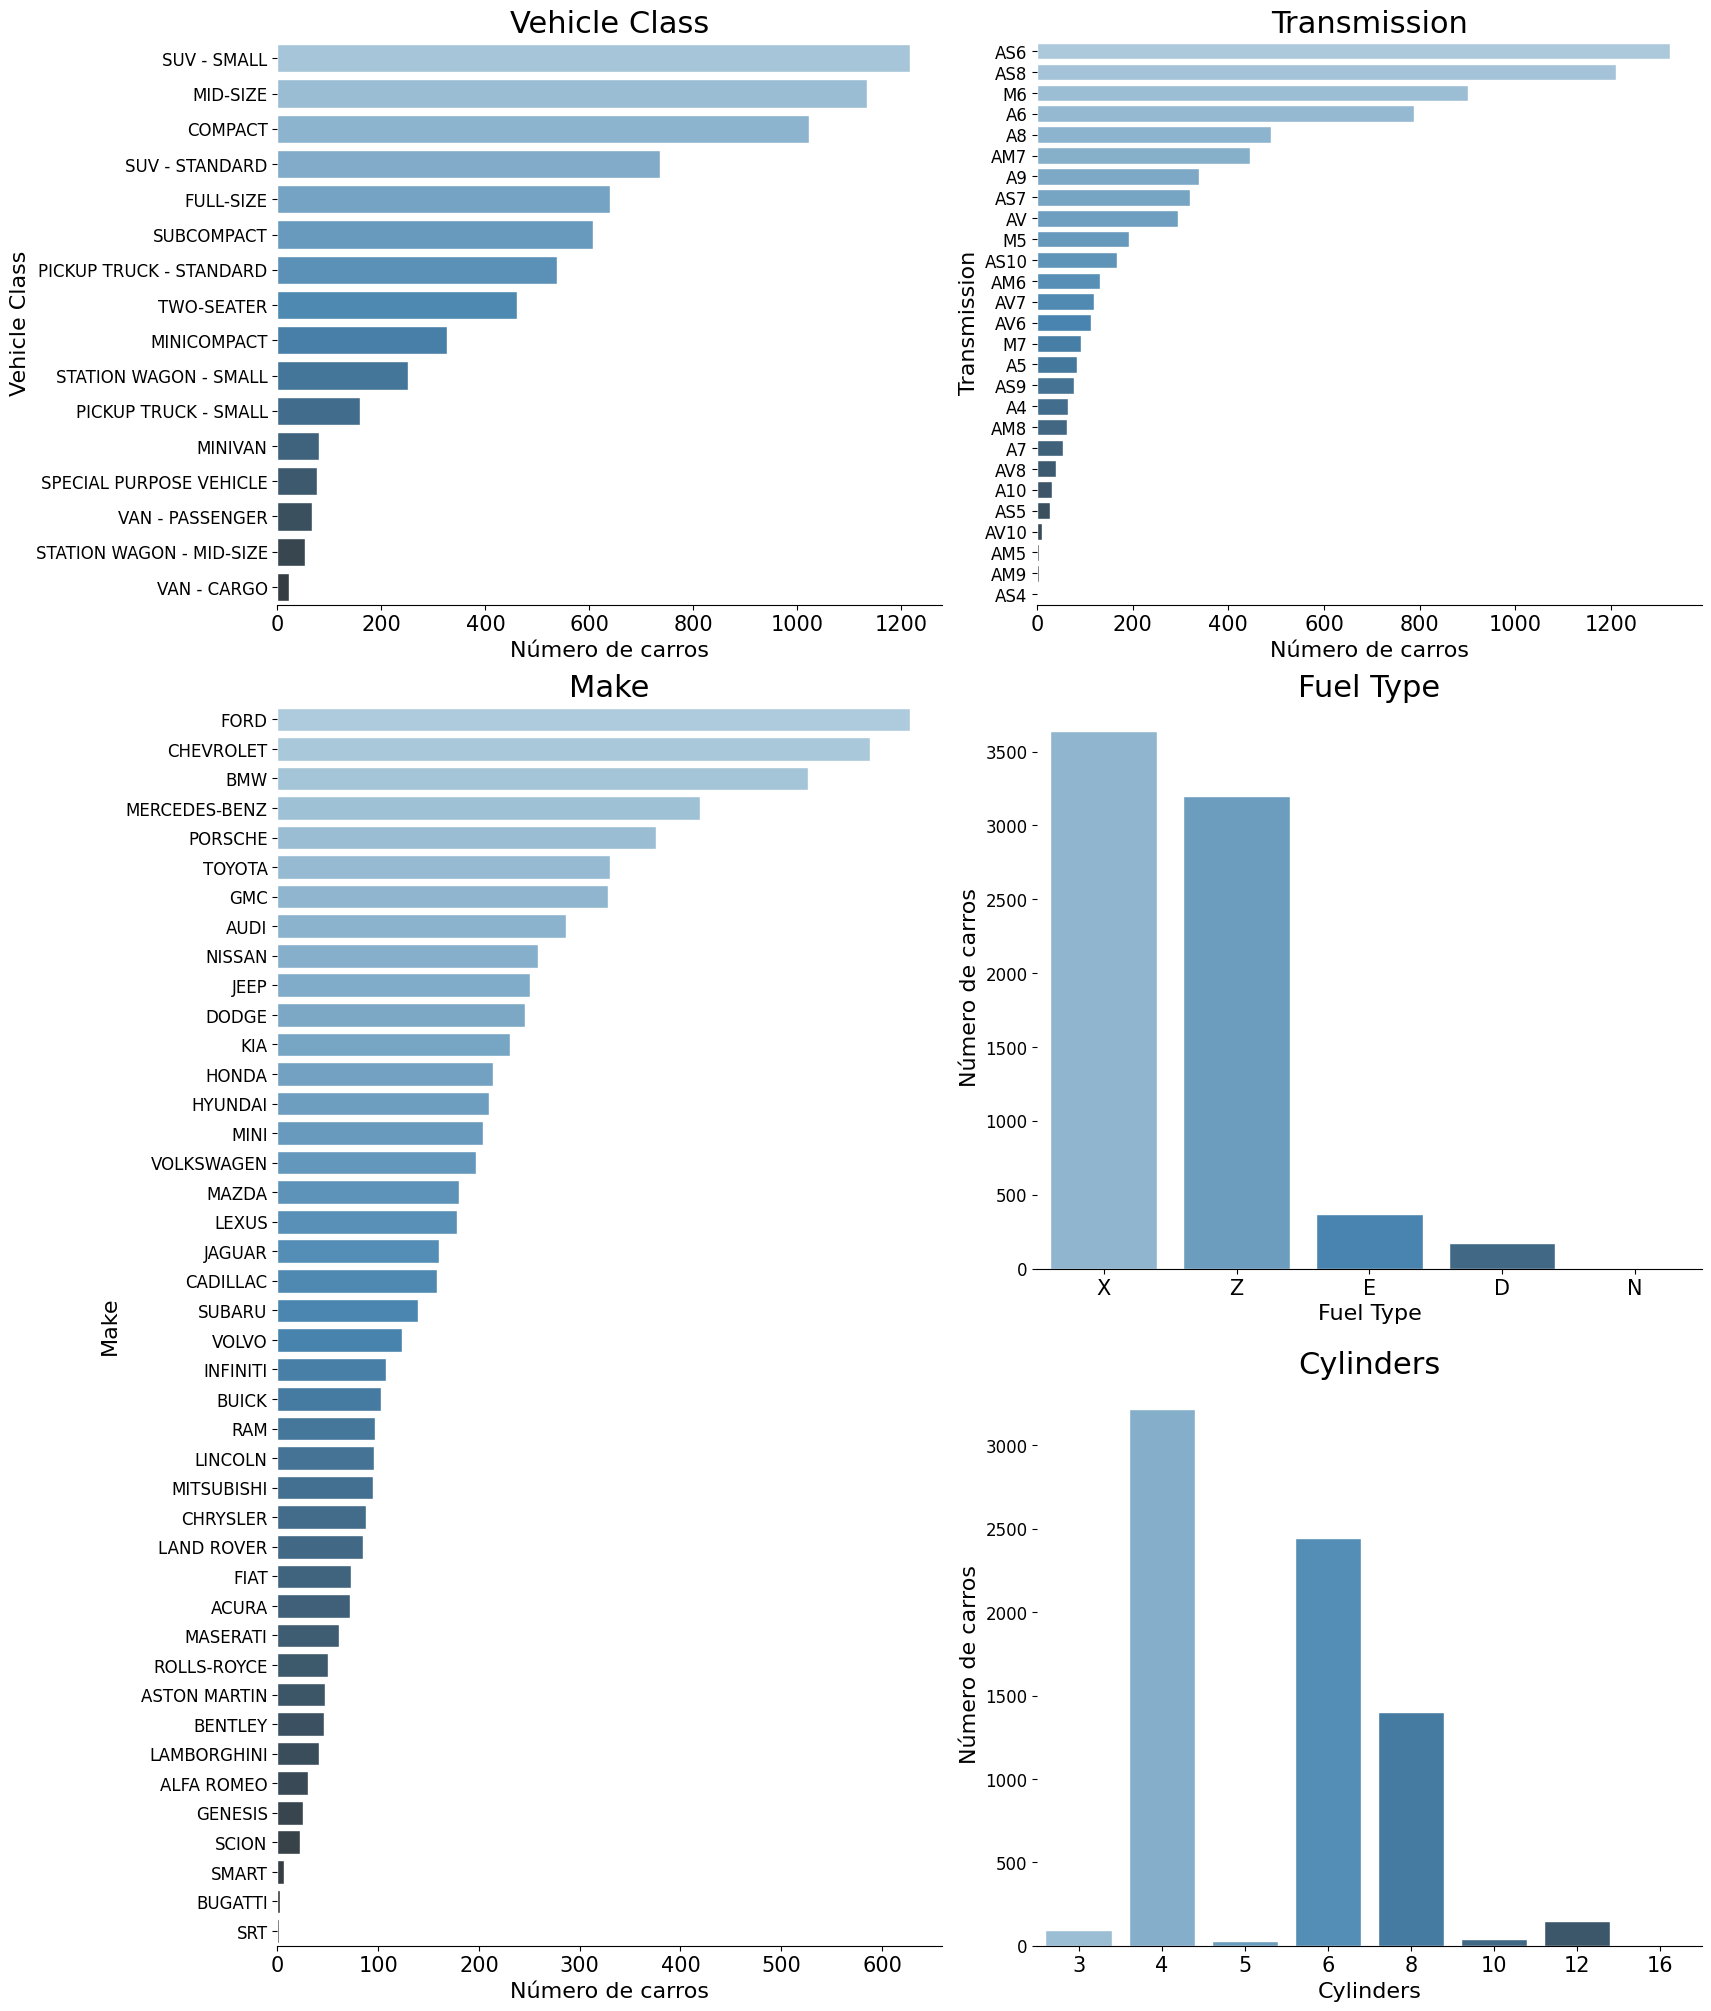

In [9]:
fig = plt.figure(constrained_layout=True, figsize=(17, 20))

# define os eixos
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])    #vehicle class
ax2 = fig.add_subplot(gs[0, 1])    #transmission
ax3 = fig.add_subplot(gs[1:, 0])   #Make
ax4 = fig.add_subplot(gs[1, 1])    #cilinders
ax5 = fig.add_subplot(gs[2, 1])    #fuel type

# monta as figuras
bar_plot_cate(ax1, df=df, col="Vehicle Class")
bar_plot_cate(ax2, df=df, col="Transmission")
bar_plot_cate(ax3, df=df, col="Make")
bar_plot_cate(ax4, df=df, col="Fuel Type",horizontal=False)
bar_plot_cate(ax5, df=df, col="Cylinders",horizontal=False)


>**Considerações**
>- Estas distribuições fornecem algumas informações interessantes sobre os dados, pois mostram a frequência em que ocorrem carros com certas características. Podemos notar, por exemplo, no gráfico da variável 'Cylinders', que  carros com 4 cilindros são os mais comuns no dataset, enquanto carros com 5 cilindros não são muito comuns. Observando os gráficos da variável 'make' concluímos que a maioria dos carros no dataset são da montadora 'Ford'. Observações semelhantes podem ser obtidas pelos demais gráficos.<br>
>- A variável categórica 'Model' possui muitos valores únicos (cardinalidade), por isto um gráfico de barras não foi feito neste caso. Contudo, algumas [outras análises](#ana_descr) foram feitas para esta coluna.

<a id="distr_num"></a>
<font color="#404258" size=+1.0><b>
    4.2 Variáveis numéricas
</b></font>

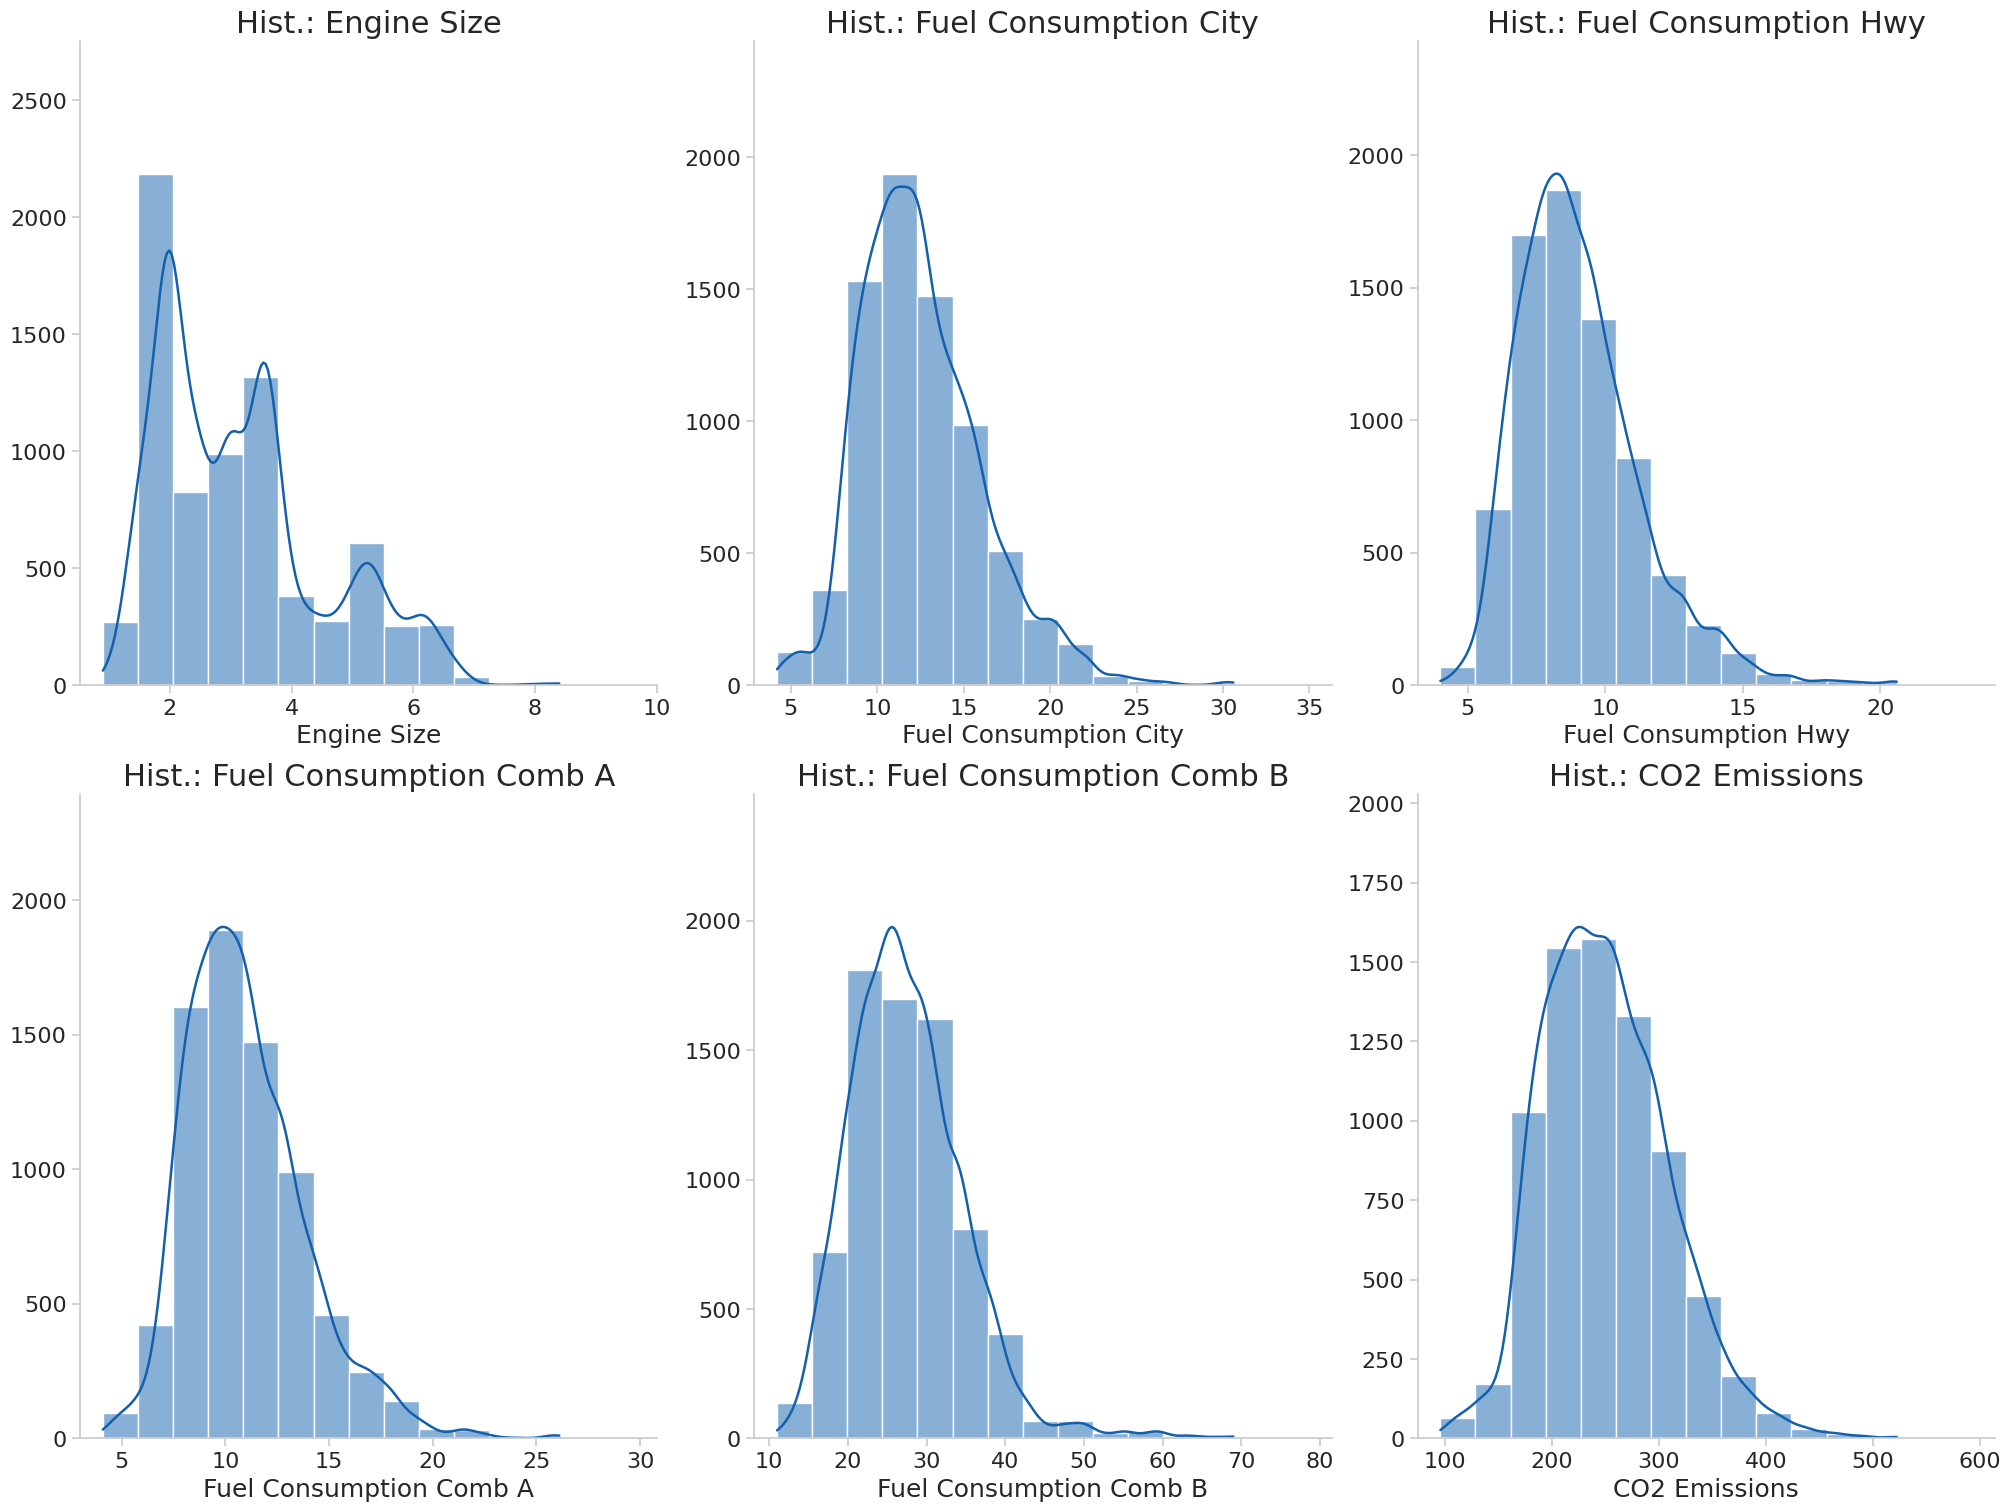

In [113]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))

# define os eixos (axes)
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])
ax6 = fig.add_subplot(gs[1, 2])

f.hist_var_num(ax1, df, vars_num[0])
f.hist_var_num(ax2, df, vars_num[1])
f.hist_var_num(ax3, df, vars_num[2])
f.hist_var_num(ax4, df, vars_num[3])
f.hist_var_num(ax5, df, vars_num[4])
f.hist_var_num(ax6, df, vars_num[5])

plt.show()


>**Considerações**</br>
>- Podemos notar que a distribuição da variável 'Engine Size'   apresenta uma grande assimetria. Isto pode ter efeito negativo em alguns modelos preditivos. Quando este for o caso, uma transformação nos dados pode apresentar melhorias nas previsões. Contudo, os modelos considerados neste trabalho não são muito afetados por estas assimetrias, sendo assim, tais transformações não foram consideradas.

<a id="corr"></a>
<font color="#404258" size=+2.5><b>
    5 Correlações
</b></font>

<a href="#indice" class="btn btn-primary btn-sm"
   role="button" aria-pressed="true"      
   style="background-color:#A5C9CA; color:white; border:none"
   data-toggle="popover">
   Índice
</a>


Nesta seção são estudadas as correlações entre a variável 'CO2 Emissions' e as demais variáveis numéricas. Foi feito um correlograma para estas correlações e na sequência foram plotados scatter plots entre  'CO2 emissions' e as demais variáveis numéricas.

In [97]:
def plot_heatMap(df_heatmap,titulo):
    """Plota um heat map
    
    Args:
        df_heatmap: dataframe com dados em formato apropriado para
            o heatmap
        titulo: título da figura
    """

    fig,ax = plt.subplots(figsize=(7,6))
    sns.heatmap(df_heatmap,
                annot=True,
                fmt=".2f",
                cmap="crest",
                linewidths=0.005, 
                annot_kws={'fontsize':12}
               )

    ax.tick_params(axis='x', labelsize=12, labelrotation=90)
    ax.tick_params(axis='y', labelsize=12, labelrotation=0)    

    ax.set_title(titulo, size=20)#,fontweight='bold'
    plt.show()

In [102]:
def plot_scatter(ax, df, x_col, y_col): 
    """Plota em scatter plot para duas variáveis numéricas
        
    Args:
        ax: eixo da figura onde será plotado scatter plot
        df: dataframe com os dados
        x_col: nome da variável plotada no eixo X
        y_col: nome da variável plotada no eixo Y    
    """
    
    sns.scatterplot(data=df, 
                x=x_col,
                y=y_col,
                hue='Fuel Type',
                palette='tab20b_r',             
                ax=ax
               )
    
    ax.set_title(x_col, size=22)#fontweight='bold'
    ax.tick_params(axis='x', labelsize=16,labelrotation=0)
    ax.tick_params(axis='y', labelsize=16,labelrotation=0)
    ax.set_ylabel("CO2 Emissions",size=20)
    ax.set_xlabel(x_col,size=20)
    ax.legend(title="Fuel Type",title_fontsize=15, fontsize=15)  

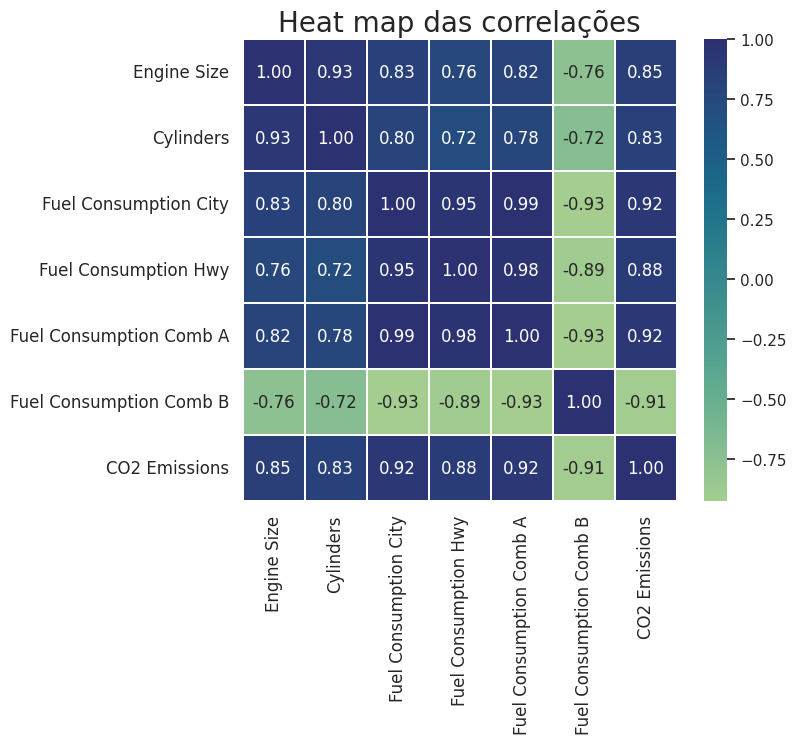

In [103]:
# calcula as correlções 
cate_mask = (df.dtypes == object)
cols_num = df.columns[~cate_mask].tolist()
df_corr=df[cols_num].corr()
plot_heatMap(df_corr,"Heat map das correlações")


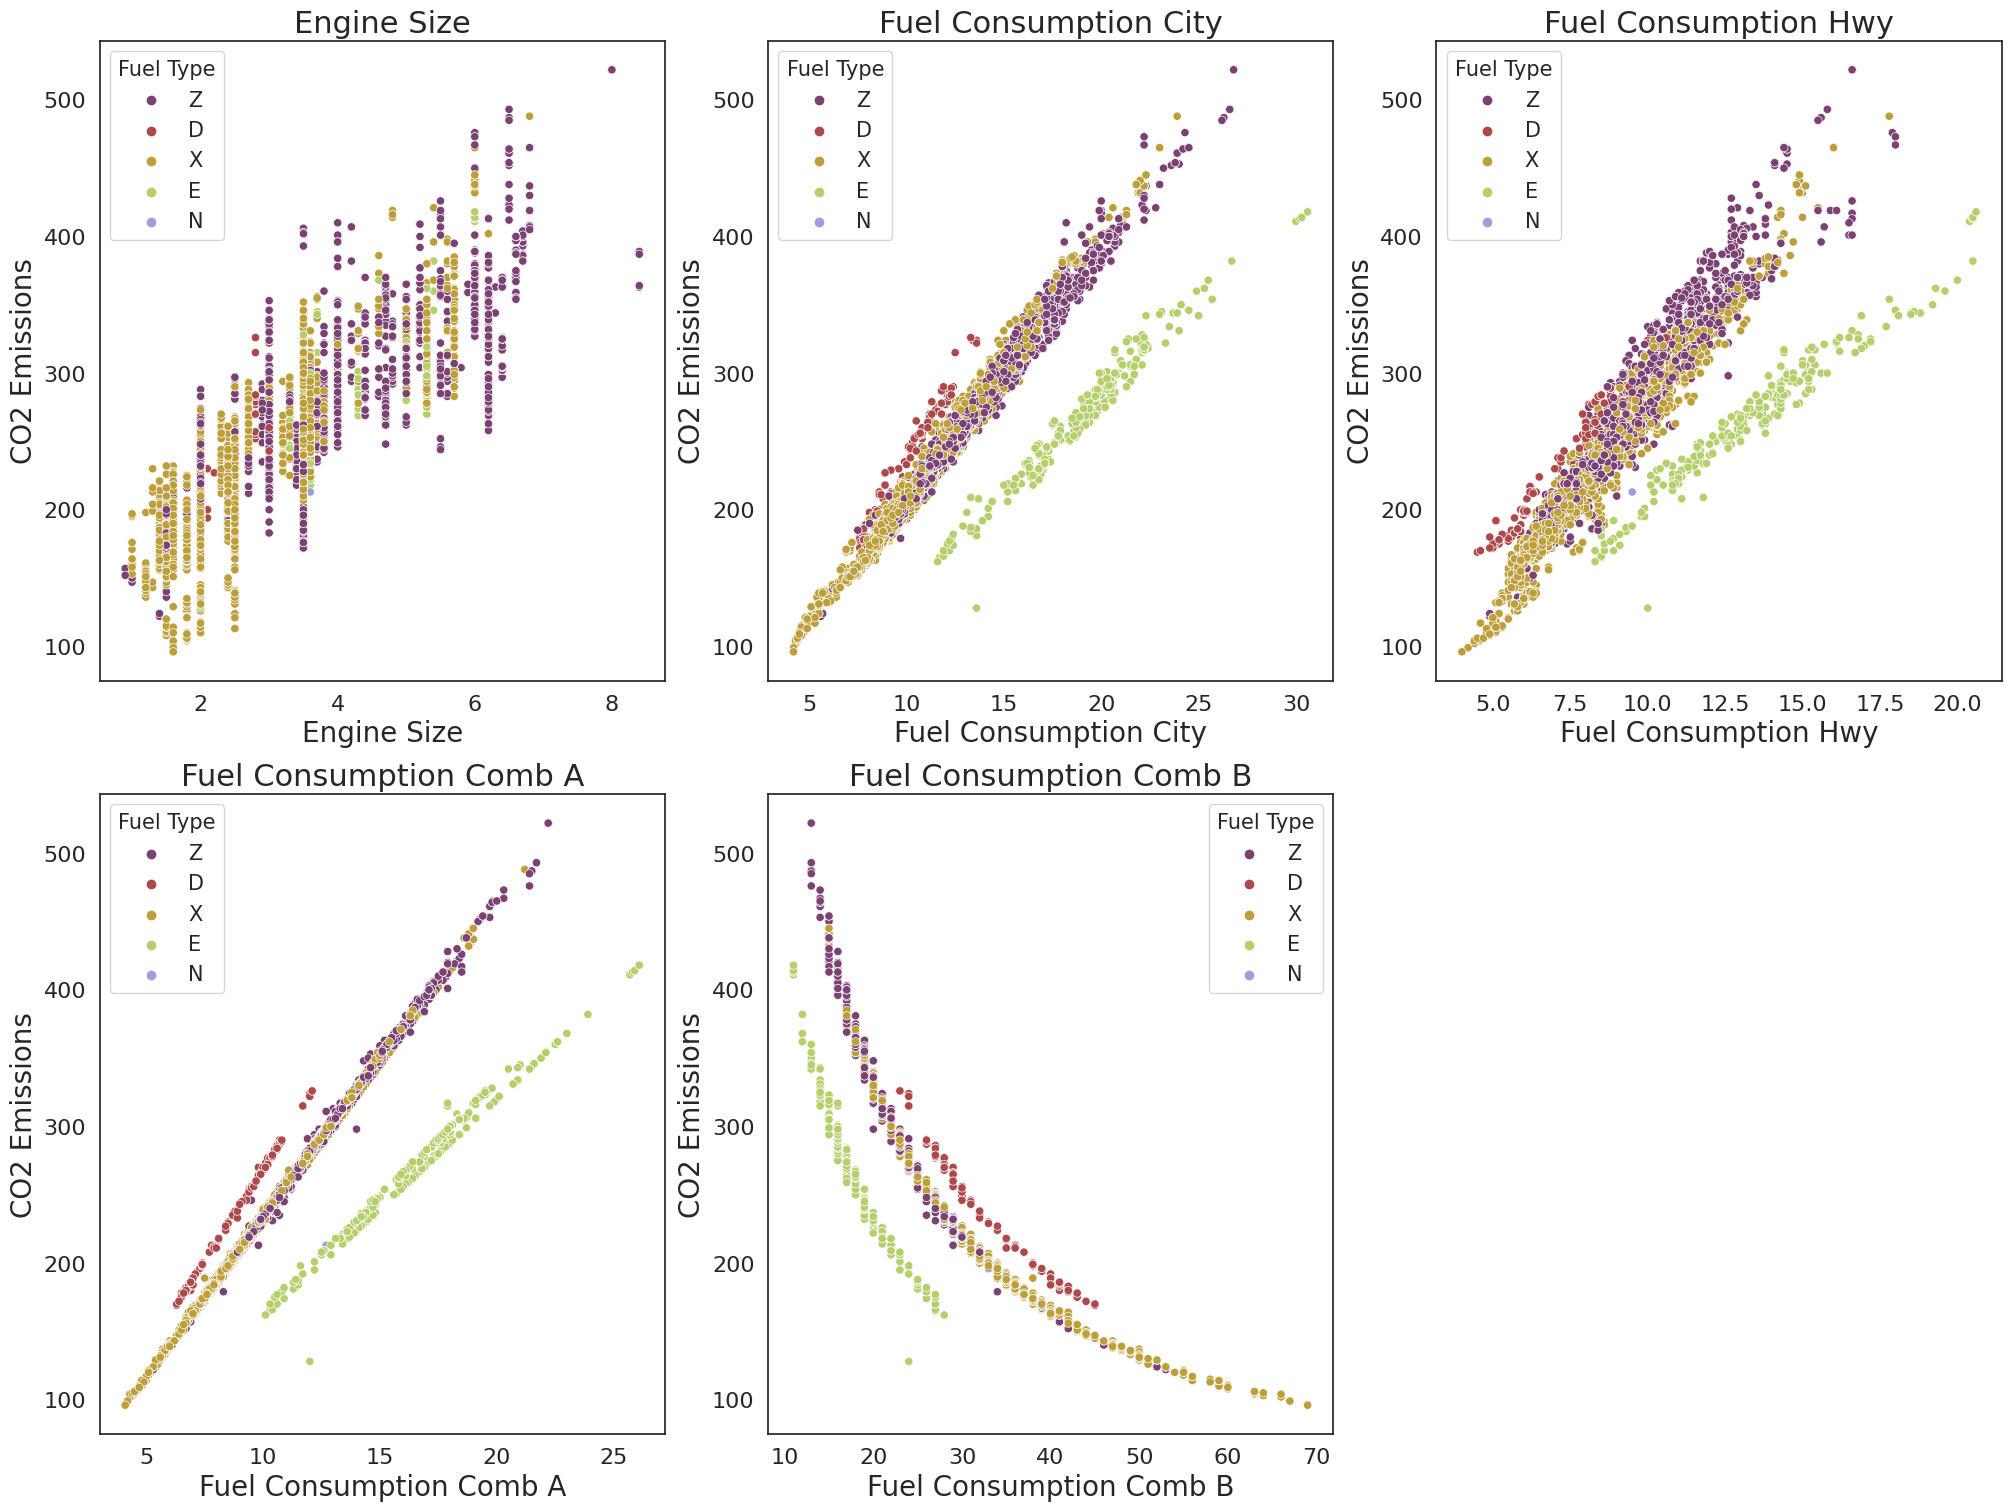

In [104]:
fig = plt.figure(constrained_layout=True, figsize=(20, 15))

# define os eixos (axes)
gs = GridSpec(2, 3, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[0, 2])
ax4 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[1, 1])

plot_scatter(ax1, df, vars_num[0], "CO2 Emissions")
plot_scatter(ax2, df, vars_num[1], "CO2 Emissions")
plot_scatter(ax3, df, vars_num[2], "CO2 Emissions")
plot_scatter(ax4, df, vars_num[3], "CO2 Emissions")
plot_scatter(ax5, df, vars_num[4], "CO2 Emissions")

plt.show()


>**Considerações**<br>
>* Observamos correlações positivas para as variáveis 'Fuel consumption city', 'Fuel consumption Hwy' e 'Fuel consumption A'.  Isto é coerente pois, é realmente esperado que a emissão de CO2 aumente com o aumento do consumo de combustível.</br>
>* Para 'Fuel consuption B' vemos correlações negativas. Isto acontece devido a unidade desta grandeza. Os dados da coluna 'Fuel consuption B' estão em milhas por galão, ou seja, estes dados fornecem quantidade de milhas que um carro consegue andar por um volume estabelecido de combustível. Quando este número aumenta, temos que o carro consegue andar mais milhas com um mesmo volume de combustível. Em outras palavras, isto significa que temos um carro é mais eficiente. Assim, é de se esperar que a emissão de CO2 (dada em g/km) diminua para carros mais eficientes (com maior valor de 'Fuel consuption B')</br>
>* Nos scatter plots para as variáveis 'Fuel consumption city', 'Fuel consumption Hwy', 'Fuel consumption A' e 'Fuel consumption B', vemos que as correlações apresentam comportamentos diferentes para os tipo de combustíveis. Temos que a relação entre os combustíveis X e Z com a emissão de CO2 são semelhantes. Já a relação entre a emissão de CO2 para os combustíveis E, D são diferentes, e ambos são diferentes do grupo X e Z.

<a id="ana_descr"></a>
<font color="#404258" size=+2.5><b>
    6. Análise descritiva
</b></font>

<a href="#indice" class="btn btn-primary btn-sm"
   role="button" aria-pressed="true"      
   style="background-color:#A5C9CA; color:white; border:none"
   data-toggle="popover">
   Índice
</a>


A análise descritiva foi feita visando obter informações e conclusões a partir dos dados. Pra este fim foram construídas figuras que permitiram investigar alguns questionamentos sobre os dados. Em alguns casos os questionamentos puderam ser analisados mais rigorosamente por meio de testes de hipóteses. 

As conclusões retiradas com estas análise pressupõem que o dataset consiste em uma amostra representativa dos automóveis em circulação no Canadá (pais onde os dados foram coletados).

___
* _Qual a montadora com a maior variedade de modelos produzidos? E qual a que tem a maior frota de veículos?_
___

In [46]:
# numero de modelos por montadora
numModels=[]
for var in df["Make"].unique():    
    numModels.append(df[df["Make"]==var]["Model"].nunique())    

df_modelos=pd.DataFrame(zip(df["Make"].unique(),numModels),
                        columns=['montadora','número de modelos'])\
                        .sort_values(by='número de modelos',
                                     axis=0,
                                     ascending=False)

# porcentagem de automóvies de cada montadora na amostra
df_automoveis= pd.DataFrame({"nomes":df["Make"].value_counts().index,
                       "counts":df["Make"].value_counts()/df.shape[0]})


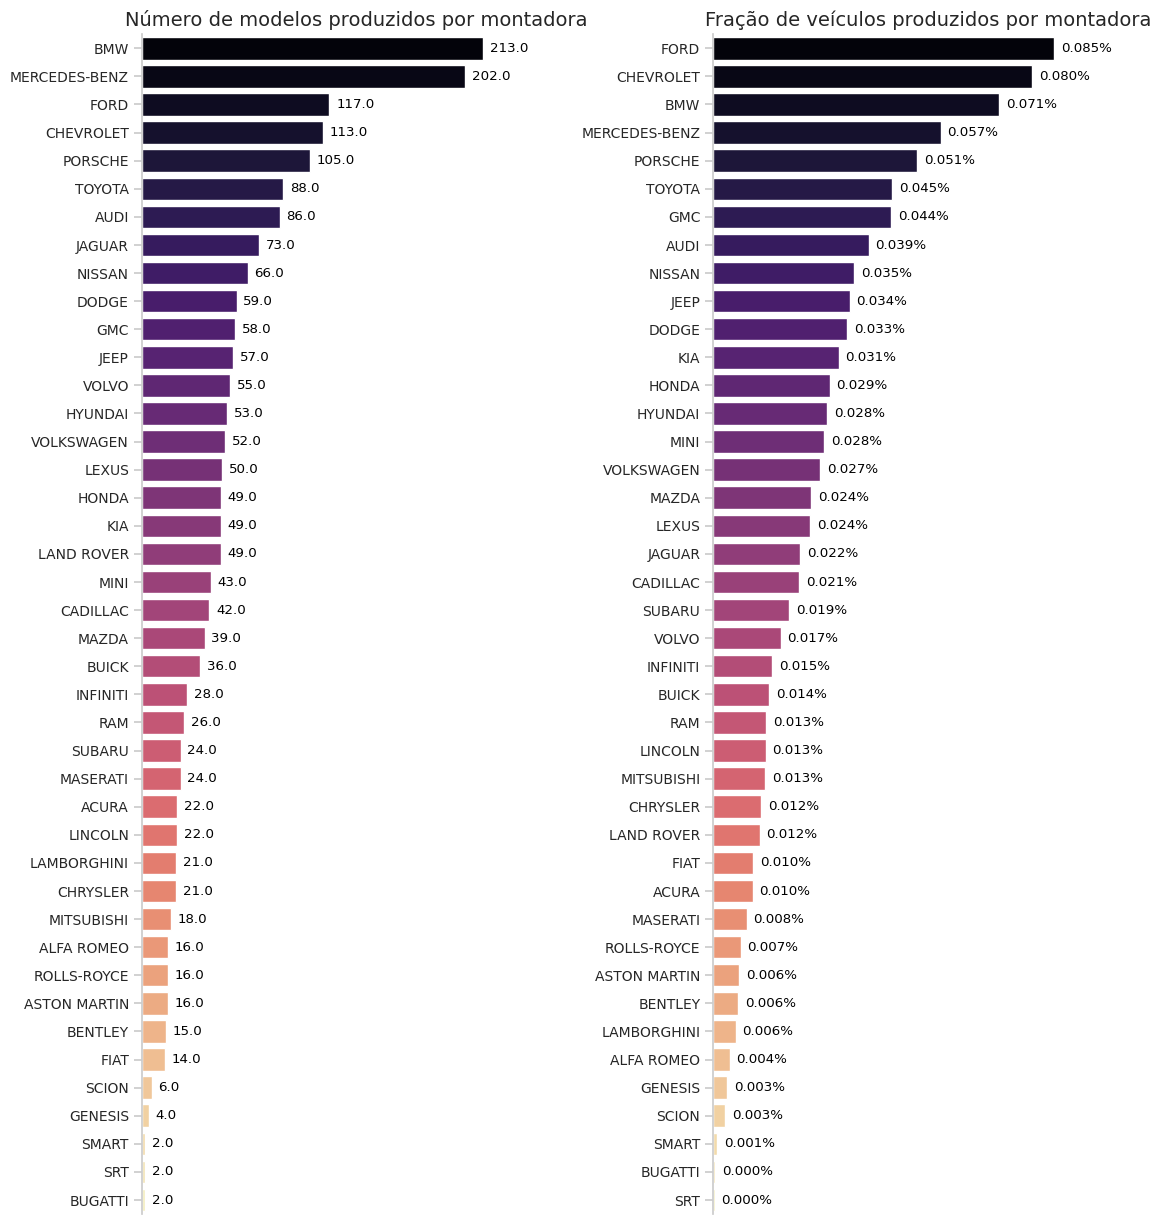

In [52]:
fig = plt.figure(constrained_layout=True, figsize=(20, 24))

gs = GridSpec(2, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

p=f.bar_plot_model_make(ax1,df_modelos, x='número de modelos', y='montadora',
                        d=1, titulo="Número de modelos produzidos por montadora")
f.bar_plot_model_make(ax2, df_automoveis, x='counts', y='nomes',
                      d=3,is_percent=True,
                      titulo="Fração de veículos produzidos por montadora")


>**Algumas conclusões**
>* A montadora 'BMW' é a que produz a maior variedade de modelos, mas não é a que possui a maior frota de veículos em circulação. A frota de automóveis da 'BMW' representa 0,071% dos carros, o que a coloca na terceira posição entre as montadores com maiores frotas.
>* A montadora 'Ford' é a que possui a maior frota de veículos em circulação, mas não é a que possui a maior variedade de modelos.

___
* _Quais os modelos mais e menos frequentes?_
___

Para responder esta questão, foi plotado um gráfico de barras para os números de veículos de um mesmo modelo. No eixo X do gráfico foi colocado o nome do modelo e entre parênteses o nome da montadora. Foram selecionadas as barras dos 10 modelos mais frequentes e as barras dos 10 modelos menos frequentes.

Etapas para a construção da figura:

1. Contabilizar o número de automóveis de cada modelo. Fazer esta contagem para os 10 modelos mais frequentes e os 10 modelos menos frequentes no dataset.</br>
2. Identificar a montadora dos modelos desejados e acrescentar esta informação ao nome do modelo.</br>    
3. Construir a figura com os dados gerados pelas etapas acima </br>

In [33]:
#Modelos mais produzidos e menos produzidos

# 10 modelos mais e menos frequentes na amostra
n=10
mais_frequentes=df['Model'].value_counts().head(n).index
menos_frequentes=df['Model'].value_counts().tail(n).index


# acrescenta a montadora nos nomes dos modelos
nomes_mais=[]
nomes_menos=[]

for m_mais, m_menos in zip(mais_frequentes, menos_frequentes): 
    
    # identifica a montadora
    nome_aux_mais=df[df['Model']==m_mais]['Make'].iloc[0]
    nome_aux_menos=df[df['Model']==m_menos]['Make'].iloc[0]
    
    # adiciona no nomes
    nomes_mais.append(m_mais+' ('+nome_aux_mais+')')
    nomes_menos.append(m_menos+' ('+nome_aux_menos+')')
    
    
# dataframes com os resultados    
df_modelosMais=pd.DataFrame({
    'nomes':nomes_mais,
    'numero_modelos':df['Model'].value_counts().head(n).values   
})

df_modelosMenos=pd.DataFrame({
    'nomes':nomes_menos,
    'numero_modelos':df['Model'].value_counts().tail(n).values   
})

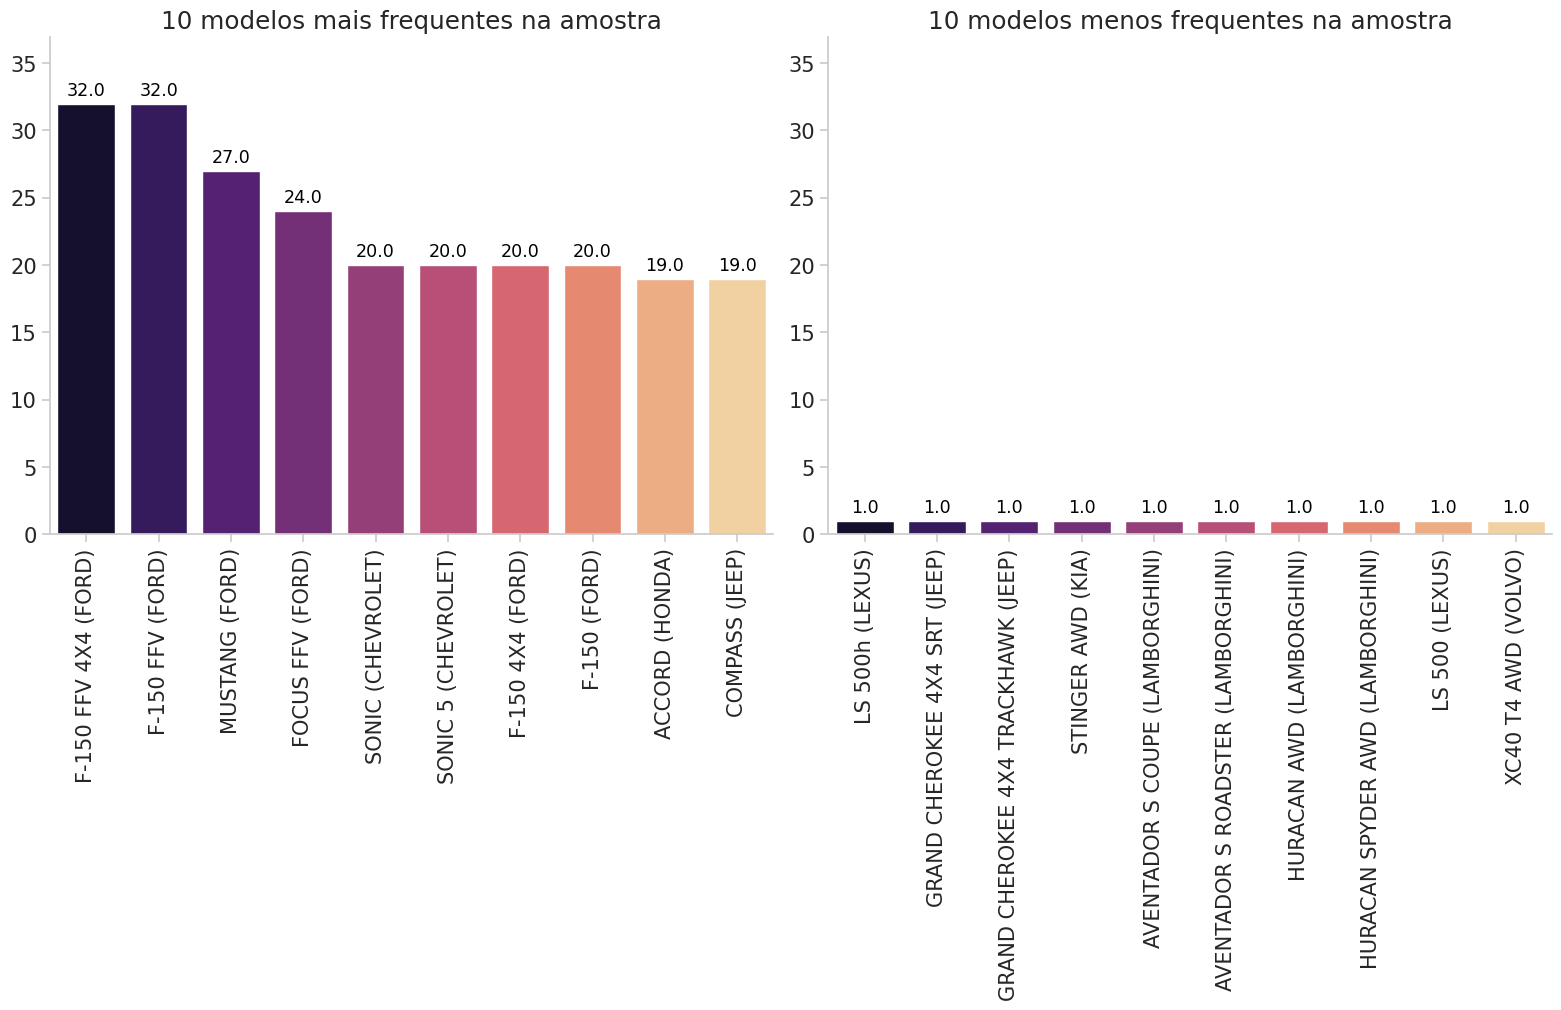

In [59]:
fig = plt.figure(constrained_layout=True, figsize=(30, 15))

importlib.reload(f)

gs = GridSpec(2, 4, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])


y_eixos, dy=f.bar_plot_freqModels(ax1, df_modelosMais, x='nomes',y='numero_modelos',
                                 titulo="10 modelos mais frequentes na amostra")

y_eixos =f.bar_plot_freqModels(ax2, df_modelosMenos, x='nomes', y='numero_modelos',           
                           y_min= y_eixos[0], y_max= y_eixos[1], dy=dy,
                           titulo="10 modelos menos frequentes na amostra")


> **Algumas conclusões**
>- Nos dataset os modelos mais frequentes são o "F-150 FFV 4X4" e o "F-150 FFV", da montadora 'Ford', ambos aparecem 32 vezes. Cada um destes modelos representa ()% dos de todos os modelos presentes. Se assumirmos o dataset como representativo dos automóveis do Canadá, podemos concluir que aproximadamente () dos carros em circulação neste país são destes 2 modelos.</br>
> - Os 10 carros menos frequentes no dataset aparecem apenas uma vez cada. Juntos, estes 10 modelos representam ()% da frota de carros do Canadá.

___

* _Quais modelo consomem mais combustível e quais consomem menos?_
* _Quais os modelos liberam mais CO2 e quais liberam menos?_
___

Estas questões podem ser respondidas analisando gráficos de barras que mostrem o consumo médio de combustível e a emissão média de CO2 para cada modelo. Como temos muitos modelos no dataset, a proposta foi selecionar os 10 modelos que consomem mais combustível e os 10 modelo que consomem menos. Pelo mesmo motivo, para a emissão de CO2, selecionamos 10 modelos com maiores emissões e os 10 modelos com as menores emissões.

A construção do gráficos foi feita seguindo as etapas:

1. Calcula para o conjunto de veículos do mesmo modelo, a média de consumo de combustível e a média da emissão de CO2. Esta rotina pode ser feita pelo método "groupby" da biblioteca pandas. Vale ressaltar, que no dataset temos 3 tipos de consumo de combustível e que as figuras foram feitas individualmente para cada tipo de consumo. </br>
2. Na sequencia foram plotados gráficos, selecionando para cada caso os 10 maiores valores e os 10 menores valores.</br>  

In [9]:
#agrupa carros por modelo
df_mean_fuel=df.groupby(['Model'], as_index=False).agg(
    
    meanFuel_city = ('Fuel Consumption City','mean'),
    meanFuel_hwy = ('Fuel Consumption Hwy','mean'),
    meanFuel_combA = ('Fuel Consumption Comb A','mean'),
    meanFuel_combB = ('Fuel Consumption Comb B','mean'),    
    meanCO2 = ('CO2 Emissions','mean'),   
    countModel = ('Model','count'),    
)

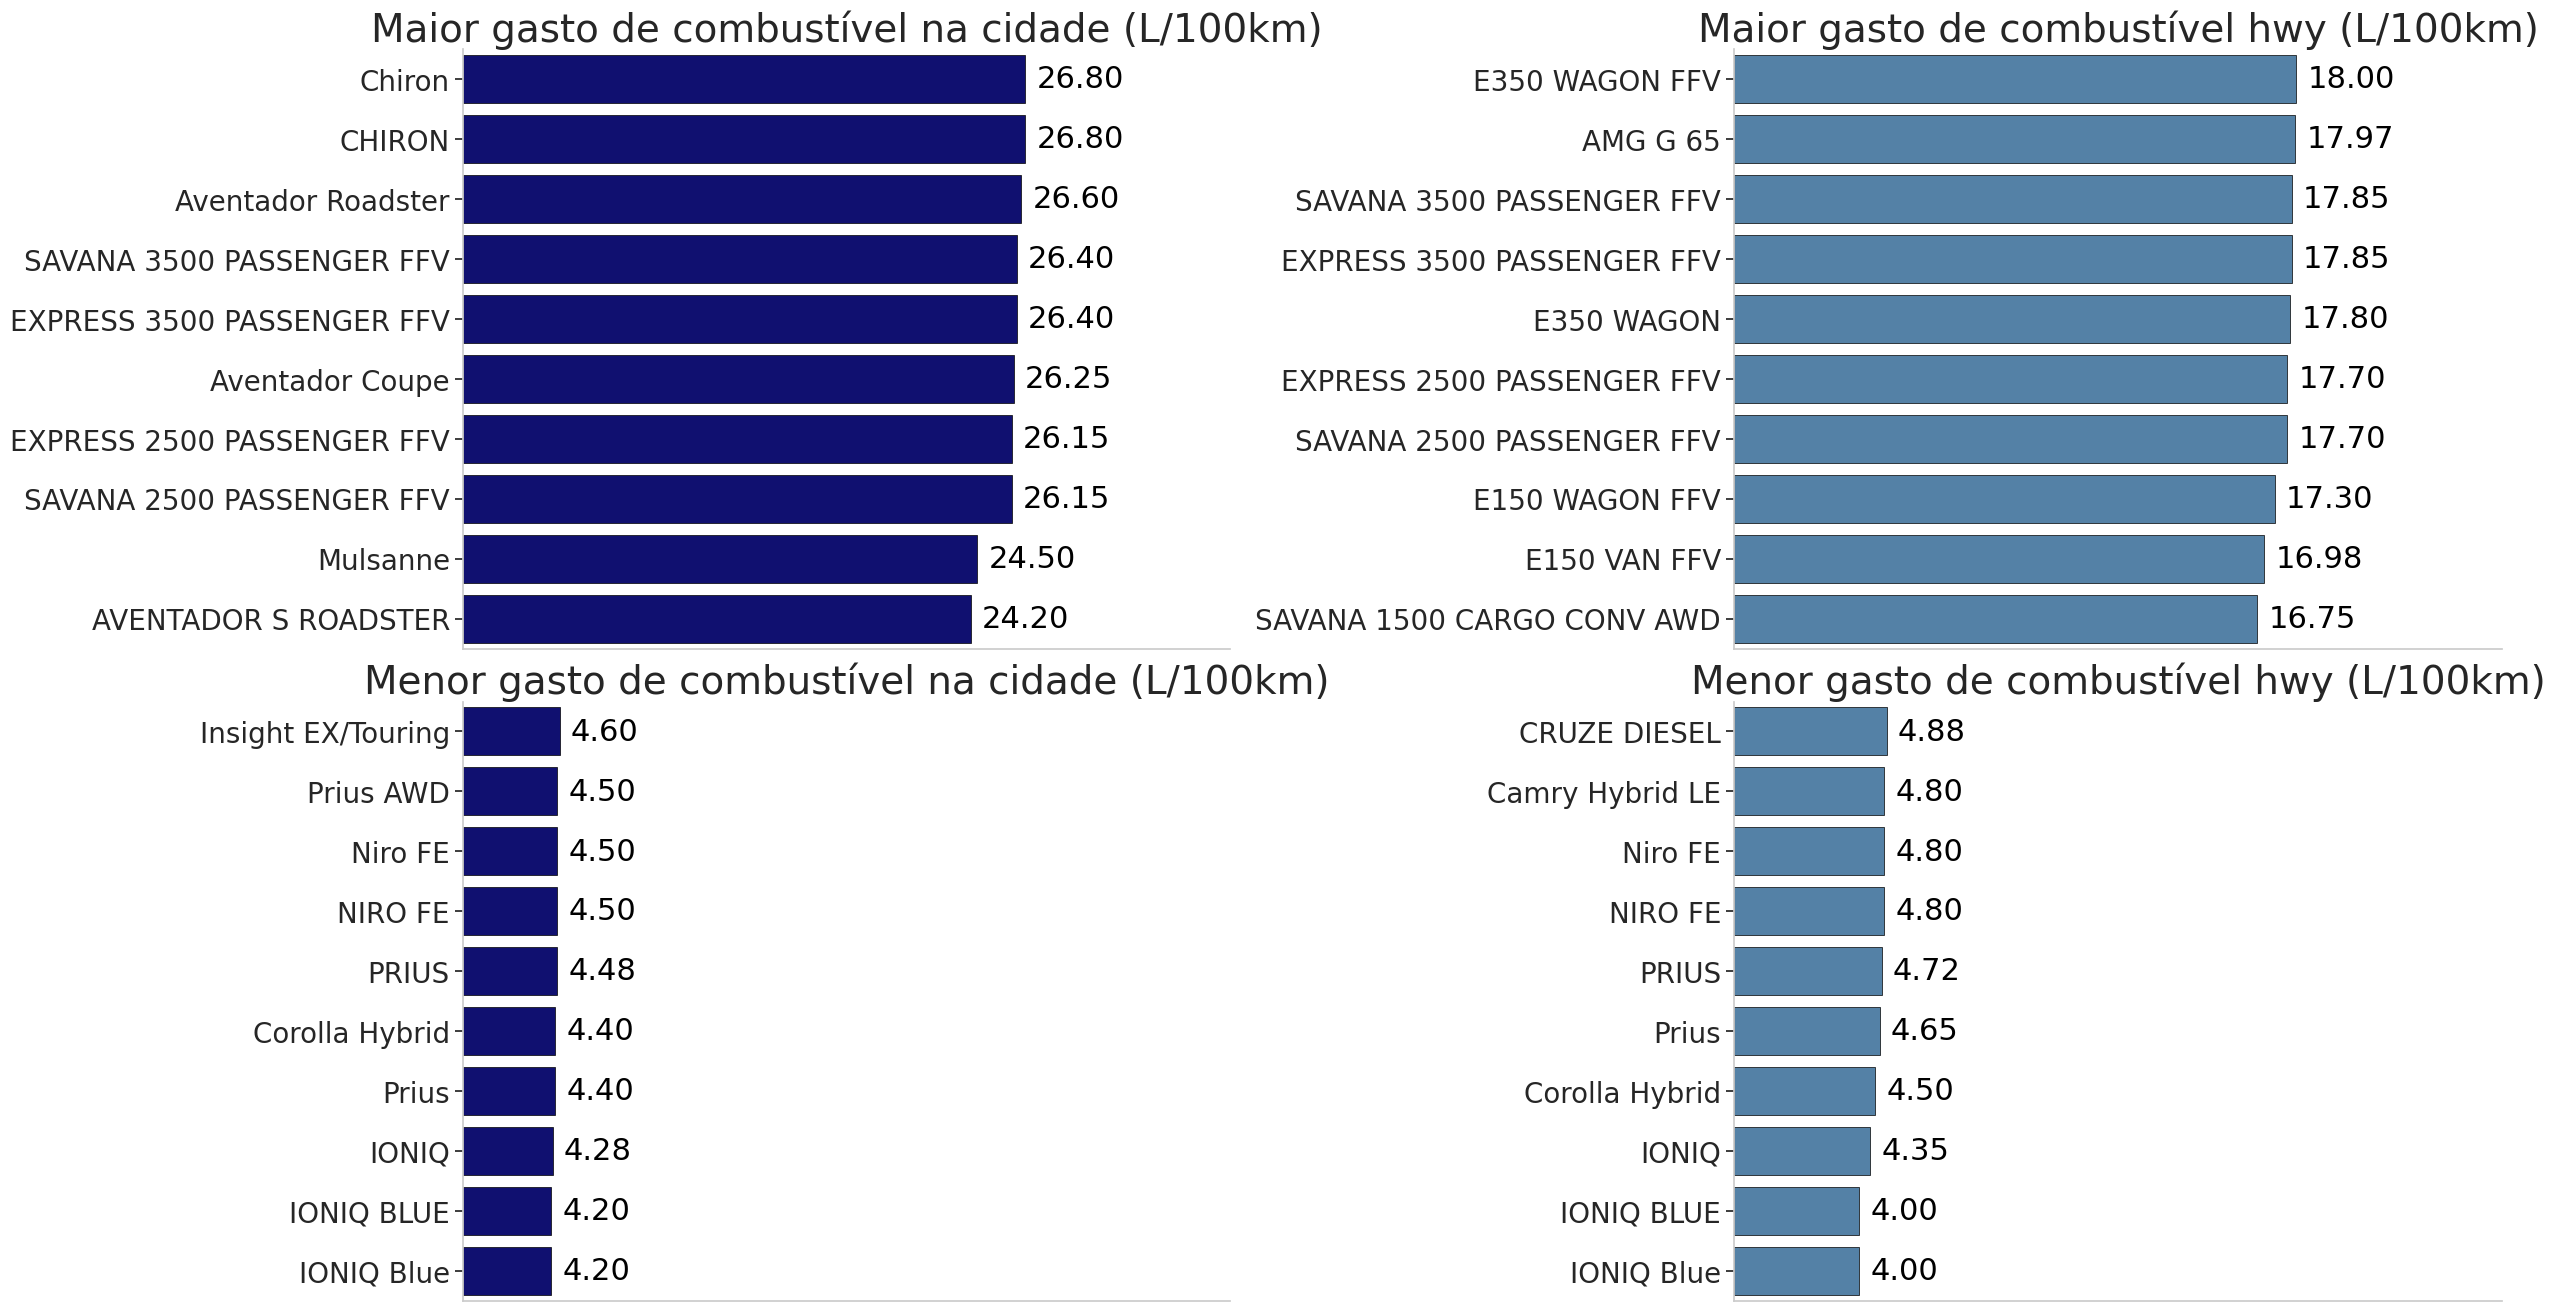

In [14]:
fig = plt.figure(constrained_layout=True, figsize=(25, 13))

# define os eixos (axes)
gs = GridSpec(2,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])


# dados em ordem decrescente de 'meanFuel_hwy' 
df_mean_fuel=df_mean_fuel.sort_values(by='meanFuel_city',
                                      axis=0,
                                      ascending=False )

# monta a figura
x_lims,dx= f.plot_fuel_consume(ax1,df_mean_fuel,
                         col_name="meanFuel_city",
                         color=f.pdr.cores_barras[0], 
                         n=10, is_head=True,
                         titulo= "Maior gasto de combustível na cidade (L/100km)")
f.plot_fuel_consume(ax3, df_mean_fuel,col_name="meanFuel_city",
                  color=f.pdr.cores_barras[0],
                  dx=dx, x_min=x_lims[0], x_max=x_lims[1], 
                  n=10, is_head=False,
                  titulo= "Menor gasto de combustível na cidade (L/100km)")
               


# dados em ordem decrescente de 'meanFuel_hwy' 
df_mean_fuel=df_mean_fuel.sort_values(by='meanFuel_hwy',
                                      axis=0,
                                      ascending=False )

# monta as figuras
x_lims,dx=f.plot_fuel_consume(ax2, df_mean_fuel,col_name="meanFuel_hwy",                         
                            n=10, is_head=True,
                            color=f.pdr.cores_barras[1],                            
                            titulo="Maior gasto de combustível hwy (L/100km)")
f.plot_fuel_consume(ax4, df_mean_fuel,col_name="meanFuel_hwy",                  
                  n=10, is_head=False,
                  dx=dx, x_min=x_lims[0], x_max=x_lims[1],
                  color=f.pdr.cores_barras[1],                 
                  titulo="Menor gasto de combustível hwy (L/100km)")


plt.show()

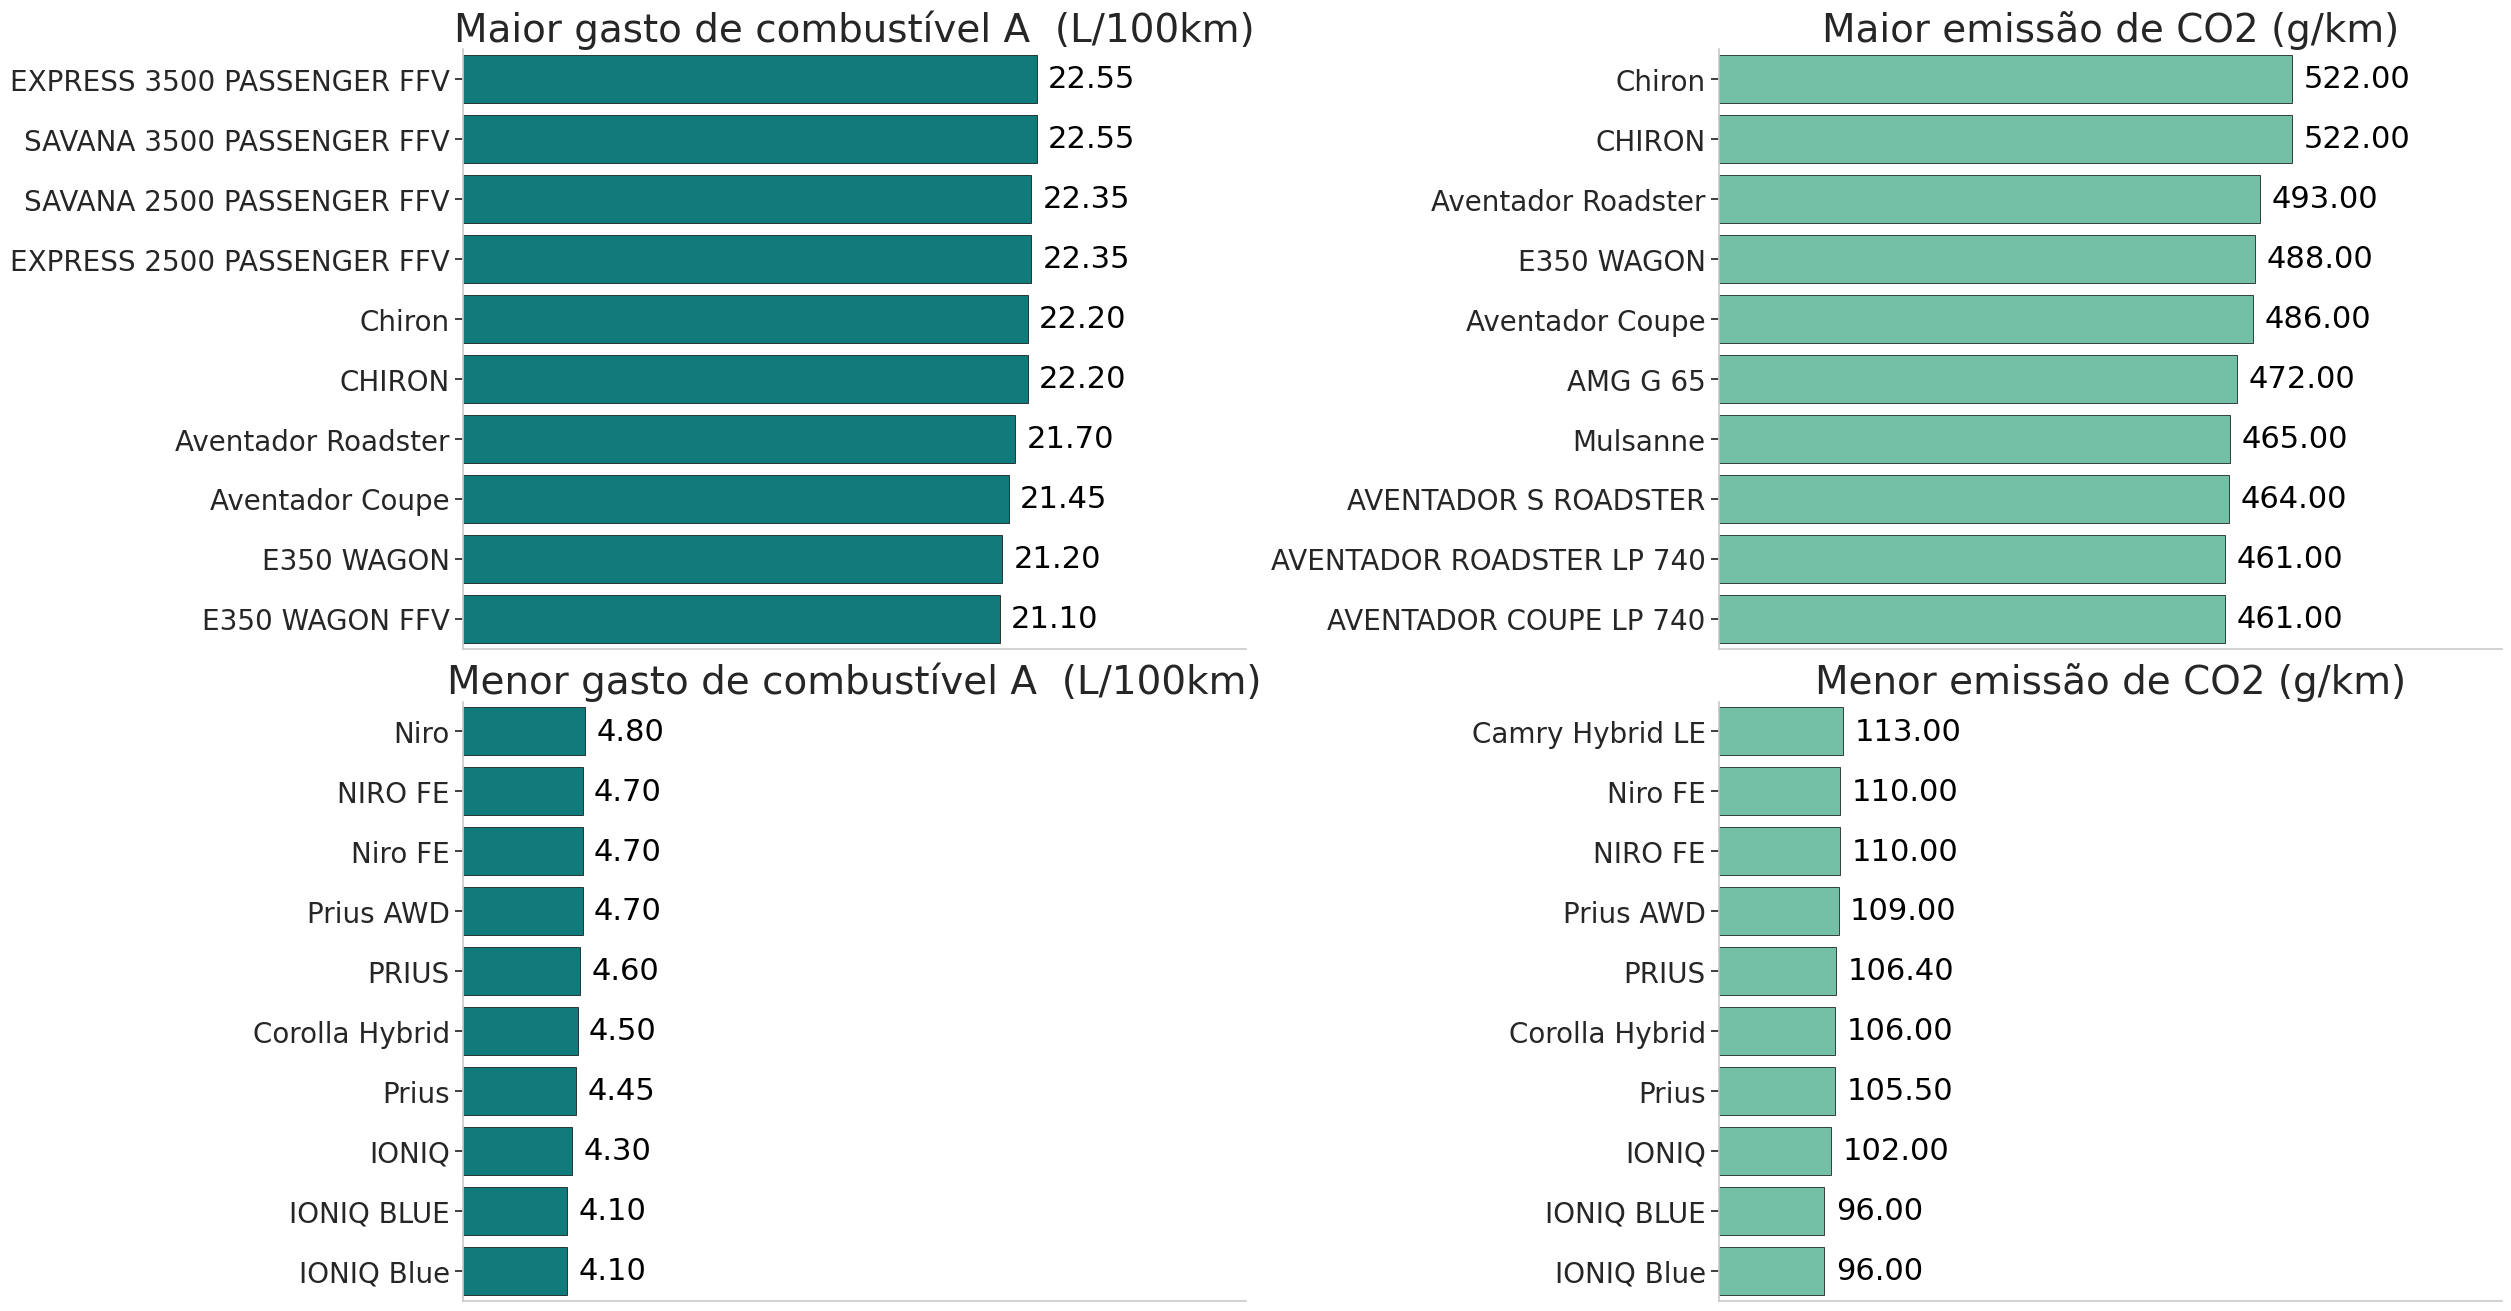

In [13]:
fig = plt.figure(constrained_layout=True, figsize=(25, 13))

# define os eixos
gs = GridSpec(2,2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])

# dados em ordem decrescente de 'meanFuel_combA' 
df_mean_fuel=df_mean_fuel.sort_values(by='meanFuel_combA',
                                      axis=0,
                                      ascending=False )


# monta a figura
x_lims,dx= f.plot_fuel_consume(ax1,df_mean_fuel,
                         col_name="meanFuel_combA",
                         color=f.pdr.cores_barras[2], 
                         n=10, is_head=True,
                         titulo= "Maior gasto de combustível A  (L/100km)")

f.plot_fuel_consume(ax3, df_mean_fuel,col_name="meanFuel_combA",
                  color=f.pdr.cores_barras[2],
                  dx=dx, x_min=x_lims[0], x_max=x_lims[1], 
                  n=10, is_head=False,
                  titulo= "Menor gasto de combustível A  (L/100km)")


# dados em ordem decrescente de 'meanCO2' 
df_mean_fuel=df_mean_fuel.sort_values(by='meanCO2',
                                      axis=0,
                                      ascending=False )

# monta as figuras
x_lims,dx= f.plot_fuel_consume(ax2,df_mean_fuel,
                         col_name="meanCO2",
                         color=f.pdr.cores_barras[3], 
                         n=10, is_head=True,
                         titulo= "Maior emissão de CO2 (g/km)")

f.plot_fuel_consume(ax4, df_mean_fuel,col_name="meanCO2",
                  color=f.pdr.cores_barras[3],
                  dx=dx, x_min=x_lims[0], x_max=x_lims[1], 
                  n=10, is_head=False,
                  titulo= "Menor emissão de CO2 (g/km)")

plt.show()


<a id="emi_mont"></a>
<font color="#404258" size=+1.0><b>
    6.1 Análise da emissão de CO2 e consumo de combustível por montadora
</b></font>


Podemos analisar a emissão de CO2 e o consumo de combustível para modelos de uma montadora específica. Este estudo pode ser feito agrupando todos os modelos de uma montadora em uma  única amostra, assim, as propriedades dos dados agrupados, tais como, as distribuições e médias, podem ser calculadas e estudas. Neste trabalho foi possível, por do método descrito, comparar os consumos médios de combustíveis por montadoras. Algumas comparações foram analisadas de forma mais rigorosa pelo uso de testes de hipóteses.

Na análise apresentada, consideramos as seguintes restrições nos dados:
   - só foi considerado montadoras com mais de 100 pontos no dataset.
   - para cada questionamento selecionamos as 3 montadoras mais relevantes para a questão.

In [10]:
# seleciona montadores com mais de 100 pontos no dataset
make_counts=df["Make"].value_counts()
make_selecionado=make_counts[make_counts>=100].index
df_make_sel=df[df['Make'].isin(make_selecionado)]

In [11]:
# agrupa dados por montadoras (Make)
df_make_group=df_make_sel.groupby(['Make'], as_index=False).agg(    
    meanFuel_city = ('Fuel Consumption City','mean'),
    meanFuel_hwy = ('Fuel Consumption Hwy','mean'),
    meanFuel_combA = ('Fuel Consumption Comb A','mean'),
    meanFuel_combB = ('Fuel Consumption Comb B','mean'),
    meanCO2 = ('CO2 Emissions','mean'),
    countModel = ('Model','count'), 
)

#ordena os resultados
sort_CO2=df_make_group\
                .sort_values(by=["meanCO2"],axis=0, ascending=False)\
                .reset_index(drop=True)

sort_Fuel_city=df_make_group\
                .sort_values(by=["meanFuel_city"],axis=0, ascending=False)\
                .reset_index(drop=True)


#seleciona montadores com maiores e menores médias para emissão
# de CO2 e consumo de combustível na cidade
make_maior_emissao_CO2= sort_CO2['Make'].head(3).to_list()
make_menor_emissao_CO2= sort_CO2['Make'].tail(3).to_list()
make_maior_consum_fuel= sort_Fuel_city['Make'].head(3).to_list()
make_menor_consum_fuel= sort_Fuel_city['Make'].tail(3).to_list()

___
* Montadoras com maiores emissões de CO2 e com menores emissões de CO2
___

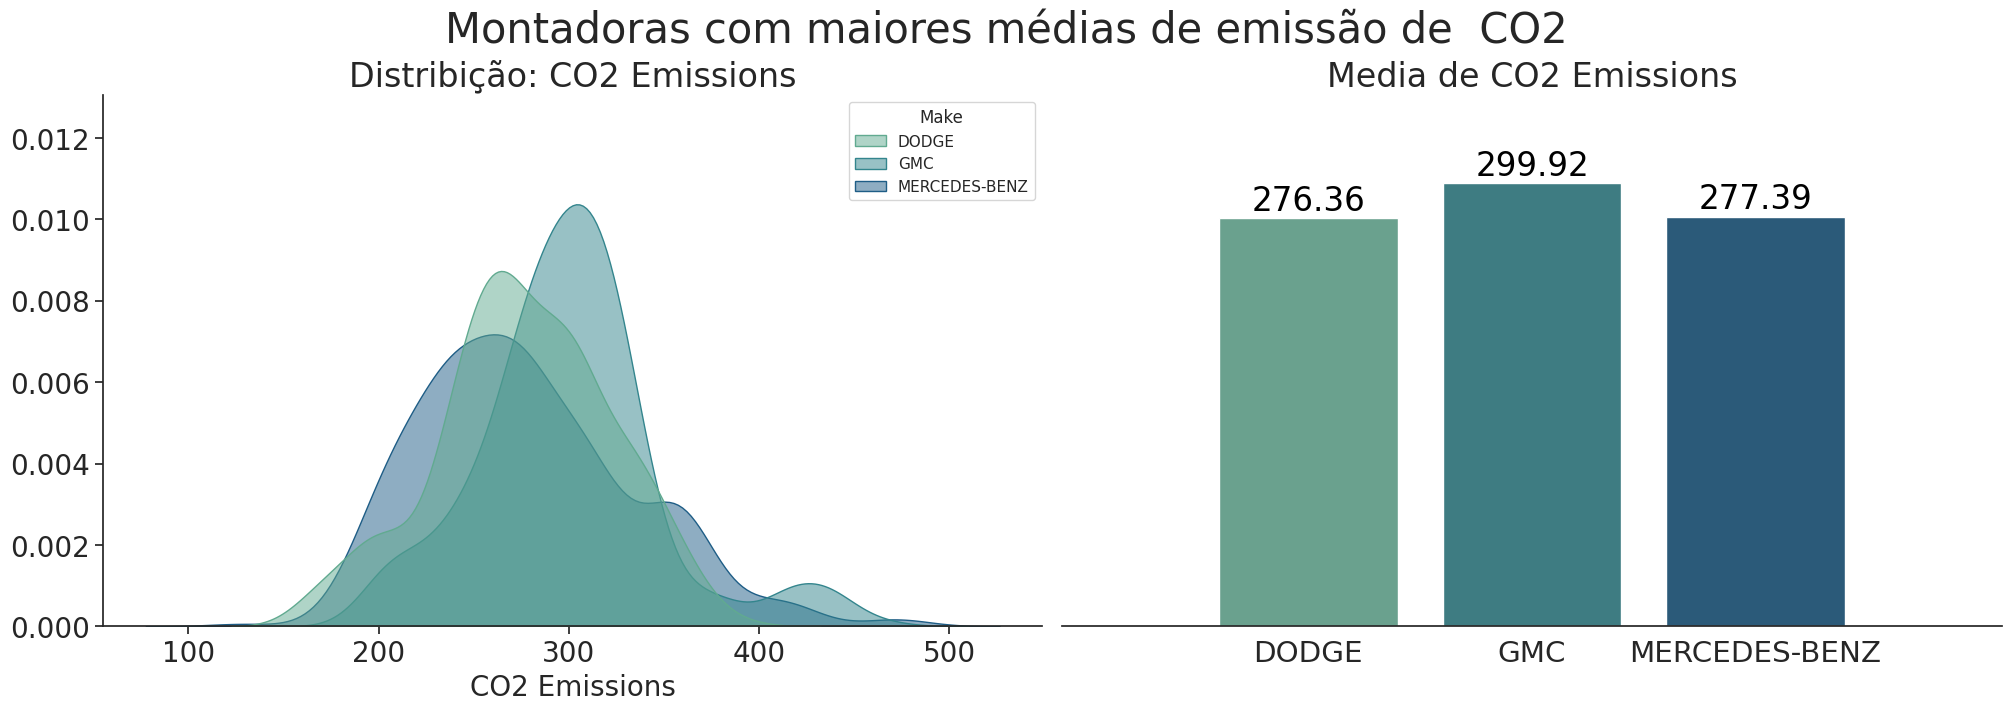

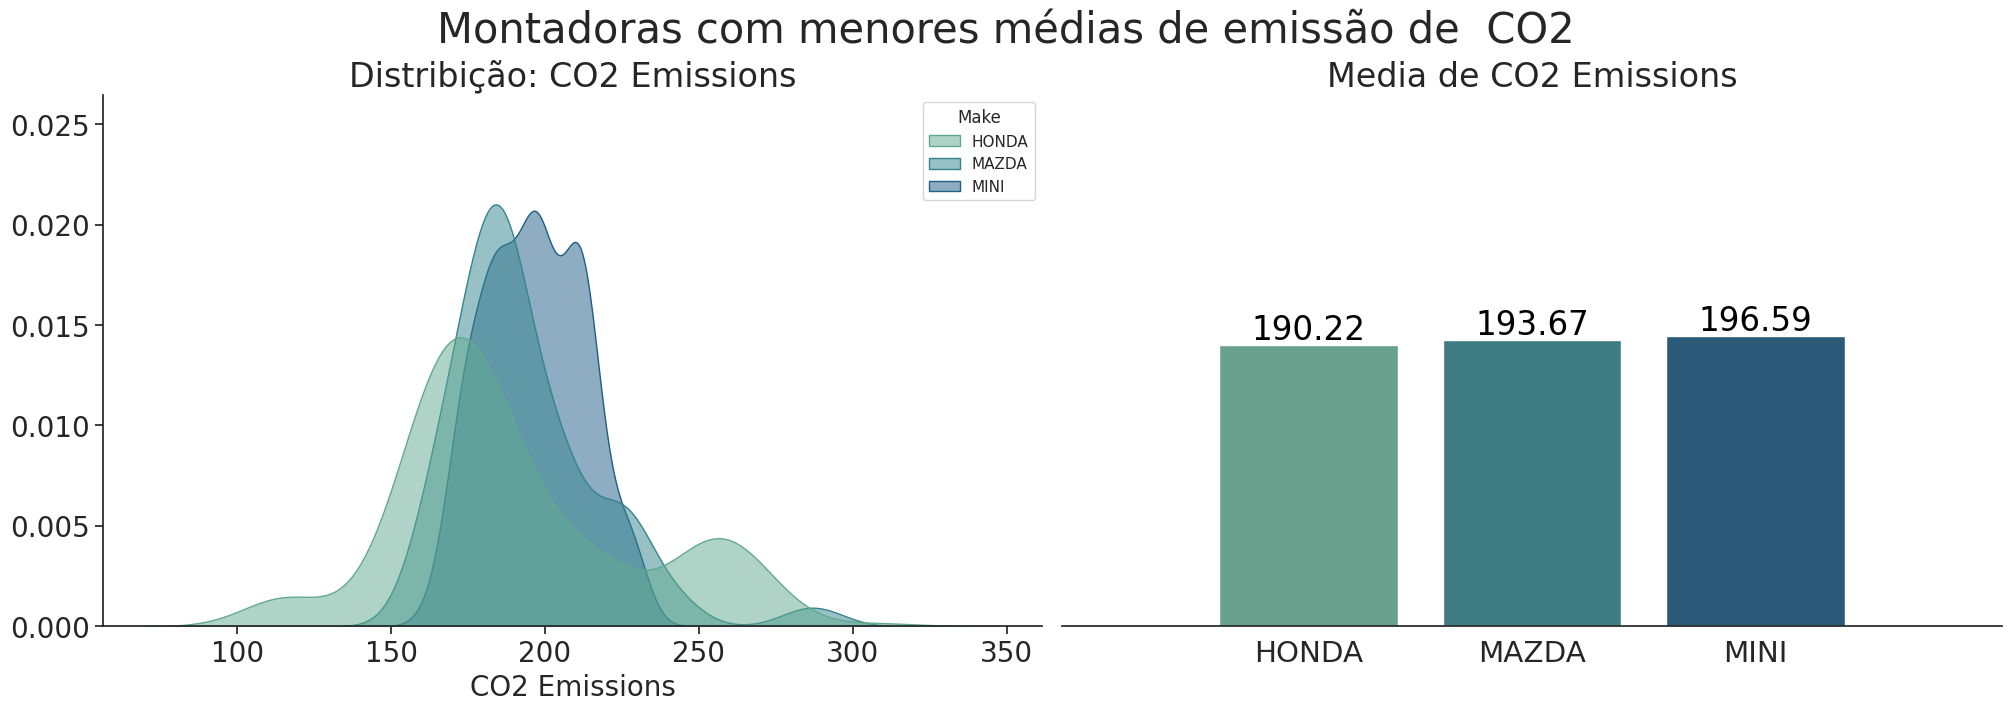

In [50]:
#titulo e variáveis para a montagem dos gráficos
conf=[("Montadoras com maiores médias de emissão de  CO2", make_maior_emissao_CO2),
      ("Montadoras com menores médias de emissão de  CO2", make_menor_emissao_CO2)
     ]

#limites dos graficos de barras
y_min=0
y_max=300

# monta os gráficos
for titulo, lista_colunas in conf:    
    
    fig = plt.figure(constrained_layout=True, figsize=(20, 7))
    fig.suptitle(titulo, fontsize=30)

    df_aux=df[df['Make'].isin(lista_colunas)]

    # define os eixos (axes)
    gs = GridSpec(1, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])    

    #monta as figuras
    f.plot_kde(ax1, df_aux, x_col="CO2 Emissions", col_hue="Make", 
             palette=f.pdr.paletas[1])
    
    f.bar_plot_kde(ax2, df_aux, x_col="Make", y_col="CO2 Emissions",
             y_min=y_min, y_max=y_max, palette=f.pdr.paletas[1])
    f.numeros_barras_verticais(ax2, f_numeros_barras=0.10, d=2)
    
    plt.show()

Observando os gráficos com as maiores médias de emissão temos indicativos de que:
1. a emissão média dos modelos da `GM` é maior do que a emissão média dos modelos da `Dodge` e da `Mercedes-Benz`.</br>
2. a emissão média dos modelos produzidos pela `Dodge` e dos modelos produzidos pela `Mercedes-Bens` são próximas o suficiente para serem consideradas estatisticamente iguais.

Observando os gráficos com as memores médias de emissão temos indicativos de que:
1. As médias de emissão dos modelos da montadora `Honda`, `Mazda` e `Mini` são equivalentes.

As afirmações acima foram feitas apenas observando os gráficos e não possuem nenhum rigor estatístico. Utilizando testes de hipóteses, podemos verificar de forma mais rigorosa, se afirmações podem ser consideradas verdadeiras. 

Os testes de hipóteses para as afirmações acima foram feitos e são mostrados na sequência. Foram usados o testes ANOVA e testes par-a-par com correções de Bonferroni . Todos os testes foram feitos com um nível de significância de: **_alpha=0.05_**

____
<font color="#A5C9CA" size=2.0><b>
   Teste 1: verifica se a emissão média de CO2 entre Dodge, GMC e Mercedes-Benz podem se consideradas iguais.
</b></font>

_____


    
_Hipótese H0:_ as médias de emissão de CO2 podem ser consideradas iguais</br>

_Hipótese HA:_ as médias de emissão de CO2 devem ser consideradas diferentes        

In [43]:
df_aux=df[df['Make'].isin(make_maior_emissao_CO2)]

In [26]:
# seleciona os pontos das amostras
amostras=[]
for col in make_maior_emissao_CO2:
    amostras.append(df[df['Make']==col]['CO2 Emissions']\
                    .values)    

In [35]:
# método para o teste
from scipy.stats import f_oneway
f_oneway(*amostras, axis=0)

F_onewayResult(statistic=22.264063238842414, pvalue=3.4832248977612183e-10)

<font color="#A5C9CA" size=1.5><b>
    Conclusões
</b></font>

Como o valor p (pvalue=3.48.10^-10) é menor que o nível de significância estabelecido (alpha=0.05), podemos concluir que a hipótese HA é verdadeira. Ou seja, a emissão média de CO2 para as montadoras `Dodge`, `Gmc` e `Mercedes-Benz` não podem ser consideradas equivalentes.</br>


O resultado do teste acima pode acontecer se ao menos um par de montadoras possuem médias distintas. Para analisar mais detalhadamente este problema foi feito testes de hipóteses entre os pares de montadoras (teste 2).

___
<font color="#A5C9CA" size=2.0><b>
**Teste 2:** testes par a par entre as médias de emissão de CO2 dos carros das montadoras Dodge, GMC e Mercedes-Bens 
</b></font>

____

_Hipótese H0:_  as médias de emissão para um par de montadoras podem ser consideradas iguais. Ex: 'média de emissão da Dodge' = 'média de emissão da GMC'.</br>

_Hipótese HA:_ as médias de emissão para um par de montadoras podem ser consideradas diferentes. Ex: 'média de emissão da Dodge' != 'média de emissão da GMC'
              
O método aplicado testa todos os pares possíveis dentre as 3 montadoras em questão.

In [66]:
# seleciona os dados das montadoras em questão
df_aux=df[df['Make'].isin(make_maior_emissao_CO2)]

In [49]:
import pingouin

# realiza os testes par a par (com correção de erro)
df_paiwise=pingouin.pairwise_tests(data=df_aux,
                                   dv="CO2 Emissions",
                                   between="Make",
                                   padjust="bonf")
df_paiwise[['A','B','T','p-unc','p-corr']]

A              B         T         p-unc        p-corr
0  DODGE            GMC -6.026693  3.097378e-09  9.292135e-09
1  DODGE  MERCEDES-BENZ -0.257087  7.971996e-01  1.000000e+00
2    GMC  MERCEDES-BENZ  5.923543  4.824258e-09  1.447277e-08

<font color="#A5C9CA" size=1.2><b>
    Conclusões
</b></font>


Na tabela acima `p-unc` é o valor p sem as correções e `p-corr` é o valor p com as correções. As conclusões devem ser feitas comparando os valores de p-corr com o nível de significância definido para os testes (**alpha=0.05**). 

- A média de emissão de CO2 dos carros da montadora `GMC` é maior que a média de emissão dos carros da montadora `Dodge`. A conclusão é obtida pois p-corr<0.05 e a hipótese HA deve ser aceita neste caso.</br>
- A médias das montadoras `Dodge` e `Mercedes-Benz` podem ser consideradas iguais. Como p-corr>0.05 a hipótese HA deve ser rejeitada, com isto, a hipótese H0 é a mais provável de ser verdadeira (com 95% de certeza)</br>

- A média de emissão de CO2 dos carros da montadora `GMC` é maior que a média de emissão dos carros da montadora `Mercedes-Benz`. A conclusão é obtida pois p-corr<0.05 e a hipótese HA deve ser aceita.

____
* _Montadoras com maiores médias de consumo de conbustível_
____


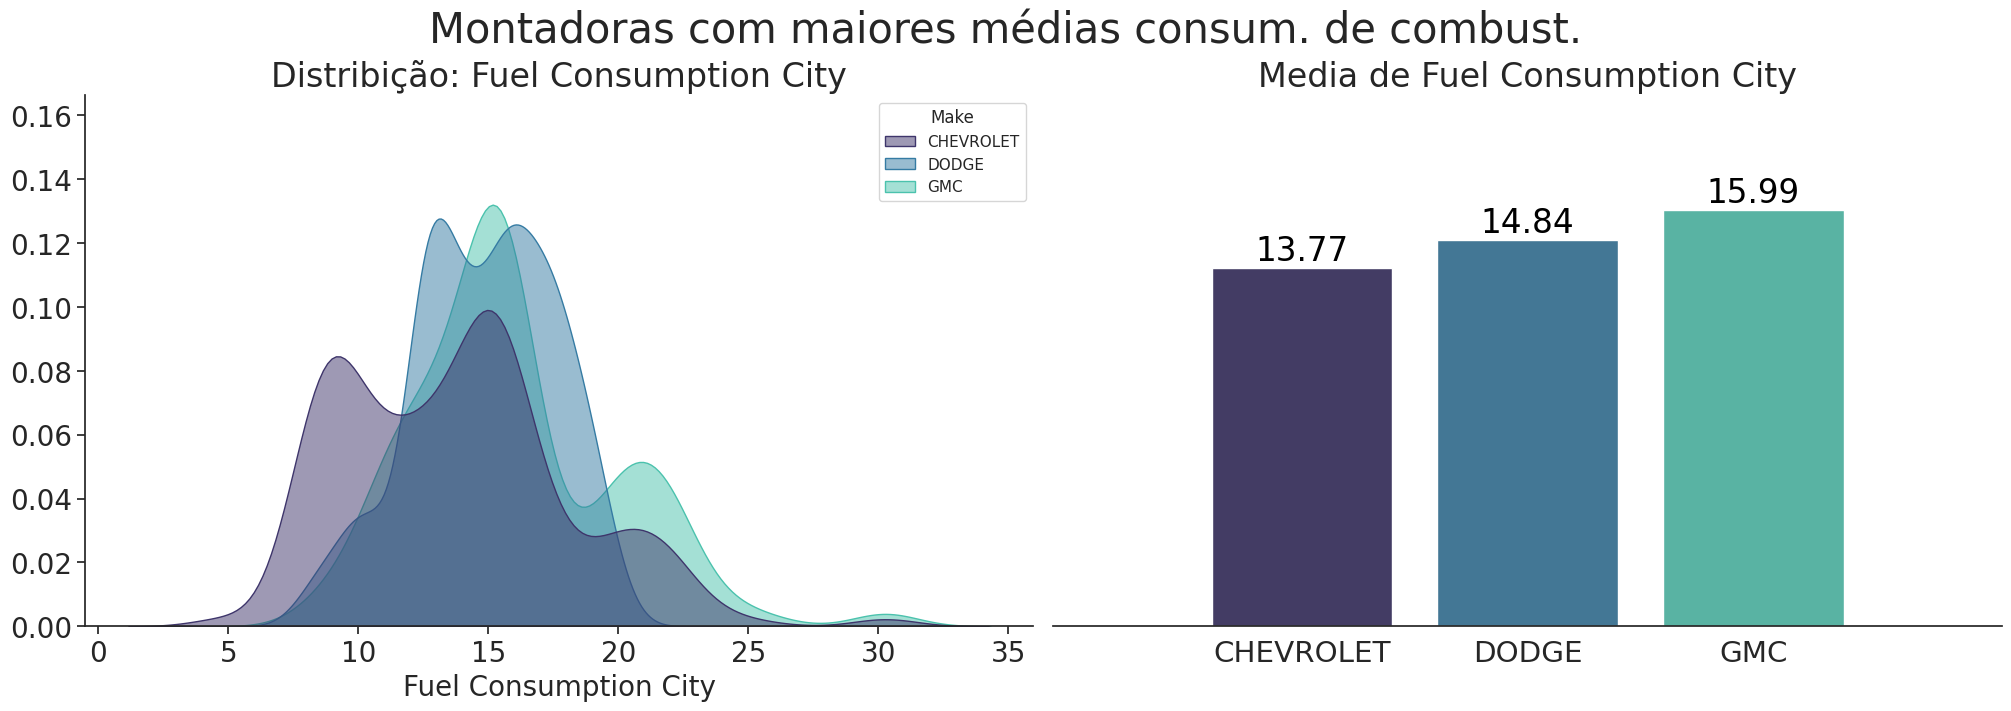

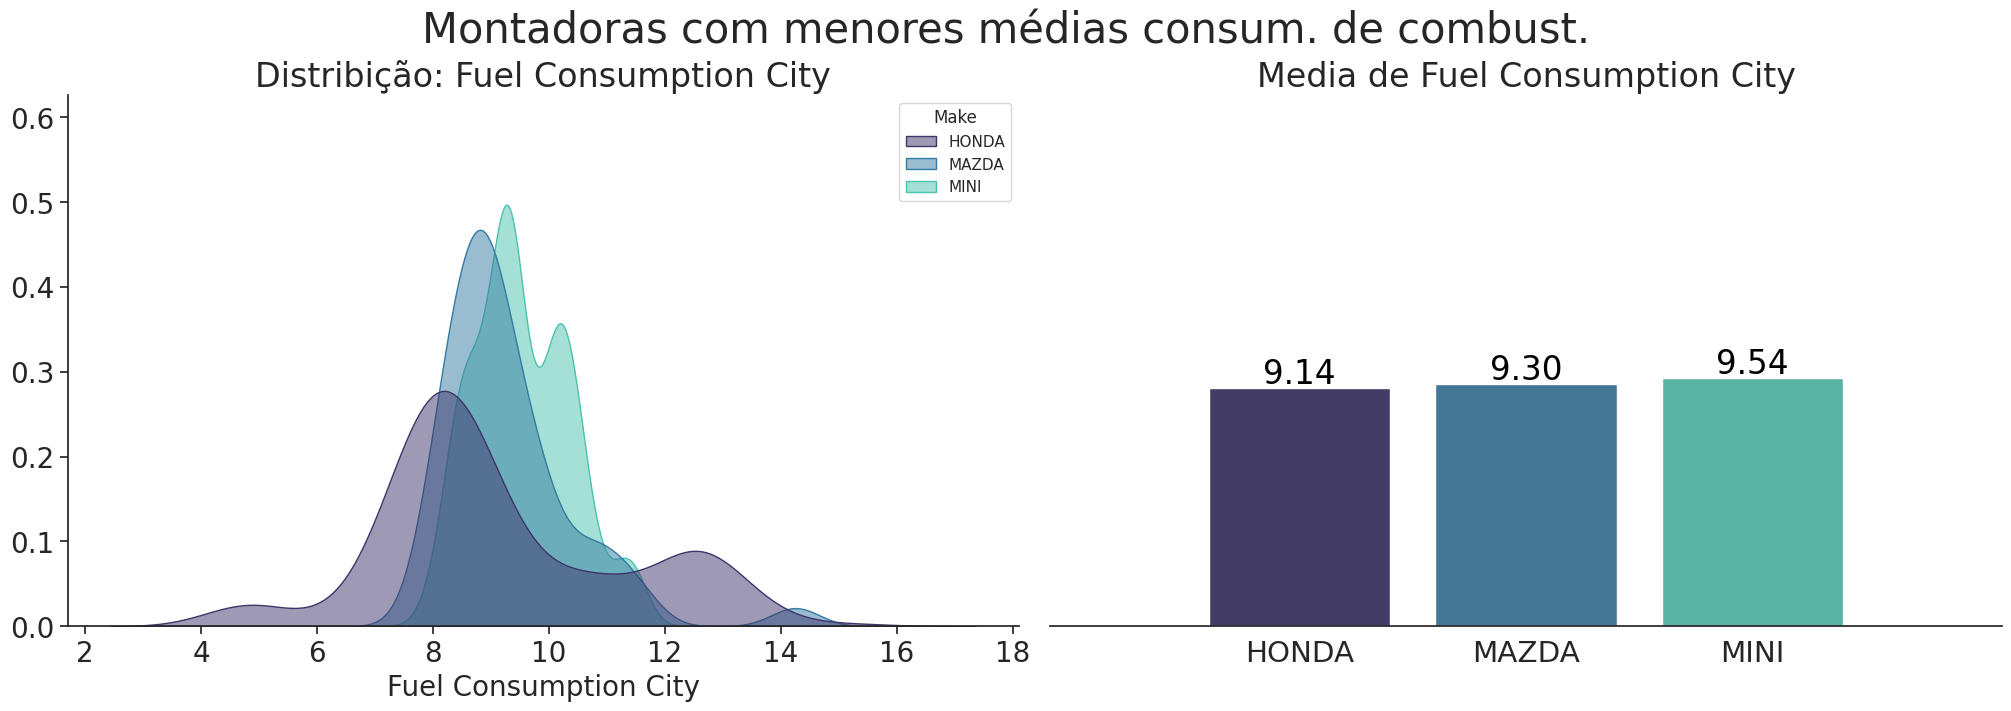

In [91]:
#titulo e variáveis para a montagem dos gráficos
conf=[("Montadoras com maiores médias consum. de combust.", make_maior_consum_fuel),
      ("Montadoras com menores médias consum. de combust.", make_menor_consum_fuel)
     ]

#limites dos graficos de barras
y_min=0
y_max=17

# --- monta os gráficos ---
for titulo, lista_colunas in conf:

    fig = plt.figure(constrained_layout=True, figsize=(20, 7))
    fig.suptitle(titulo, fontsize=30)

    df_aux=df[df['Make'].isin(lista_colunas)]

    # define os eixos (axes)
    gs = GridSpec(1, 2, figure=fig)
    ax1 = fig.add_subplot(gs[0, 0])
    ax2 = fig.add_subplot(gs[0, 1])    

    #monta as figuras
    f.plot_kde(ax1, df_aux, x_col="Fuel Consumption City", col_hue="Make", 
             palette=f.padroes.paletas[2])
    
    f.bar_plot_kde(ax2, df_aux, x_col="Make", y_col="Fuel Consumption City",
             y_min=y_min, y_max=y_max, palette=f.padroes.paletas[2]) 
    f.numeros_barras_verticais(ax2, f_numeros_barras=0.10, d=2)
    
    plt.show()

Os gráficos acima aparentemente indicam que a emissão média de CO2 para os modelos das montadoras `Honda`, `Mazda` e `Mini` podem ser considerados iguais. Esta observação pode ser confirmada com o seguinte teste de hipóteses. 

___
<font color="#A5C9CA" size=2.0><b>
**Teste:** verifica se as médias de emissões de CO2 são iguais para os carros da Honda, Mazda e Mini
</b></font>

____

_Hipótese H0:_ as médias de emissões de CO2 dos carros da Honda, Mazda e Mini podem ser consideradas iguais </br>

_Hipótese HA:_ as médias de emissões de CO2 dos carros da Honda, Mazda e Mini devem ser consideradas diferente.

O teste realizado foi o ANOVA com nível de significância de **_alpha=0.05_**

In [65]:
# seleciona os pontos das amostras
amostras=[]
for col in make_menor_consum_fuel:
    amostras.append(df[df['Make']==col]['Fuel Consumption City']\
                    .values)  

In [61]:
# método para o teste
from scipy.stats import f_oneway
f_oneway(*amostras, axis=0)

F_onewayResult(statistic=3.744671321431242, pvalue=0.024202486499278548)

<font color="#A5C9CA" size=2.0><b>
    Conclusões
</b></font>

As três médias podem ser consideras iguais. Como pvalue<0.5 a hipótese HA pode ser aceita com uma chance de 95% de acerto.

____
* _Relação entre o tipo de combustível e a emissão de CO2_
____

In [49]:
# descarta tipos de combustivel exeto o tipo N (N so possui um ponto no dataset)
df_fuel_sel=df[df["Fuel Type"].isin(['Z', 'D', 'X', 'E'])]

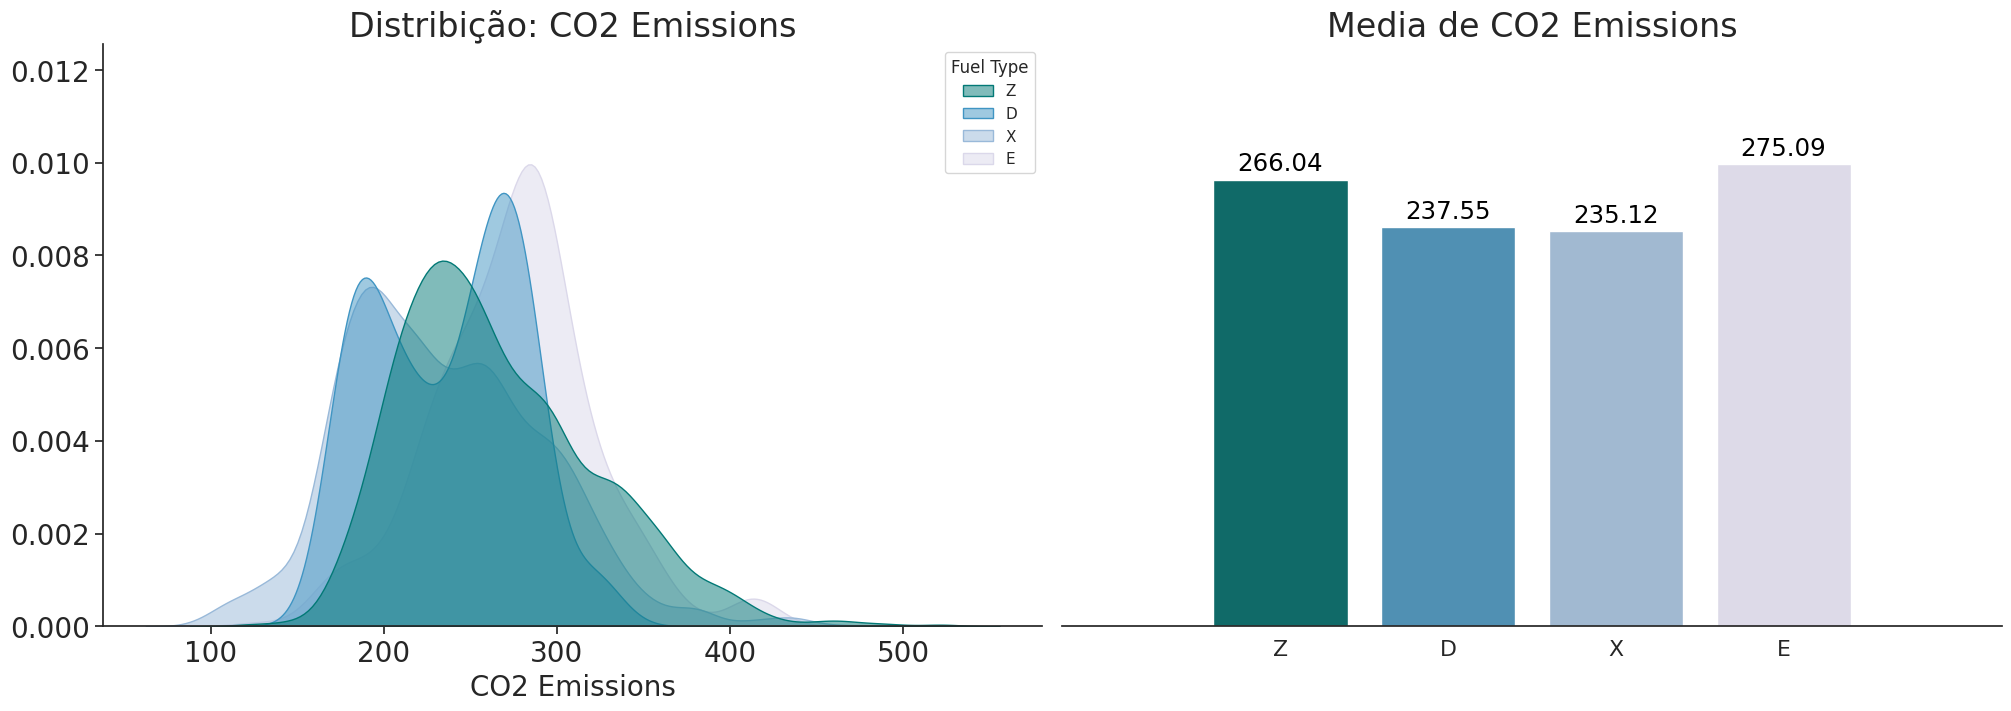

In [92]:
fig = plt.figure(constrained_layout=True, figsize=(20, 7))

# define os eixos (axes)
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

#monta as figuras
f.plot_kde(ax1, df_fuel_sel, x_col="CO2 Emissions", col_hue="Fuel Type", 
           palette=f.padroes.paletas[3])
    
f.bar_plot_kde(ax2, df_fuel_sel, x_col="Fuel Type", y_col="CO2 Emissions",
                palette=f.padroes.paletas[3])
f.numeros_barras_verticais(ax2, f_numeros_barras=0.10, d=2)

plt.show()

Os gráficos acima aparentemente indicam que:

1. As médias de emissão de CO2 podem ser consideradas iguais para carros com combustível Z e E </br>
2. As médias de emissão de CO2 podem ser consideradas iguais para carros com combustível D e X.

As afirmações acima podem ser verificadas pelo testes de hipóteses par-a-par mostrado na sequência.

___
<font color="#A5C9CA" size=2.0><b>
Teste de hipóteses
</b></font>

____

_Hipótese H0_: as médias de emissão entre dois combustíveis, escolhidos entre os 4 possíveis, são iguais. Ex: 'média de emissão de CO2 para combustível Z' = 'média de emissão de CO2 para combustível D'.</br>

_Hipótese HA_: as médias de emissão entre dois combustíveis, escolhidos entre os 4 possíveis são diferentes. Ex: 'média de emissão de CO2 para combustível Z' != 'média de emissão de CO2 para combustível D'.</br>

Os testes serão feitos ao nível de significância de: **alpha=0.5**

In [63]:
df_fuel_sel=df[df["Fuel Type"].isin(['Z', 'D', 'X', 'E'])]

In [64]:
import pingouin

# realiza os testes par a par (com correção de erro)
df_paiwise=pingouin.pairwise_tests(data=df_fuel_sel,
                                   dv="CO2 Emissions",
                                   between="Fuel Type",
                                   padjust="bonf")
df_paiwise[['A','B','T','p-unc','p-corr']]

A  B          T          p-unc         p-corr
0  D  E  -9.389746   5.608306e-19   3.364983e-18
1  D  X   0.735842   4.626600e-01   1.000000e+00
2  D  Z  -8.592857   1.915558e-15   1.149335e-14
3  E  X  15.217385   4.497266e-43   2.698360e-42
4  E  Z   3.420529   6.760105e-04   4.056063e-03
5  X  Z -22.376876  4.798604e-107  2.879162e-106

<font color="#A5C9CA" size=2.0><b>
    Conclusões
</b></font>

Os resultados são obtido pelos valores de `p_corr` (valor `p` considerando correções), e são descritos abaixo:

* As médias de emissão de CO2 podem ser consideradas iguais para carros que usam combustível do tipo D ou combustível do tipo X. A conclusão é obtida pois p-corr>0.05 e a hipótese HA deve ser recusada.

* As médias de emissão de CO2 para carros com combustível Z e E não podem ser consideradas iguais. A conclusão é obtida pois p-corr<0.05 para as médias destes combustíveis.

* Para quaisquer outras duplas de combustíveis possíveis as médias não podem ser consideradas iguais, pois p-corr<0.05 em todos estes casos.

___
* _Relação entre a emissão de CO2 e o número de cilindros_
___

In [34]:
# descartar dados de 16 e 5 cilindros: possuem poucos pontos de dados
df_cylind_sel=df[ ~ df["Cylinders"].isin([16,5])]

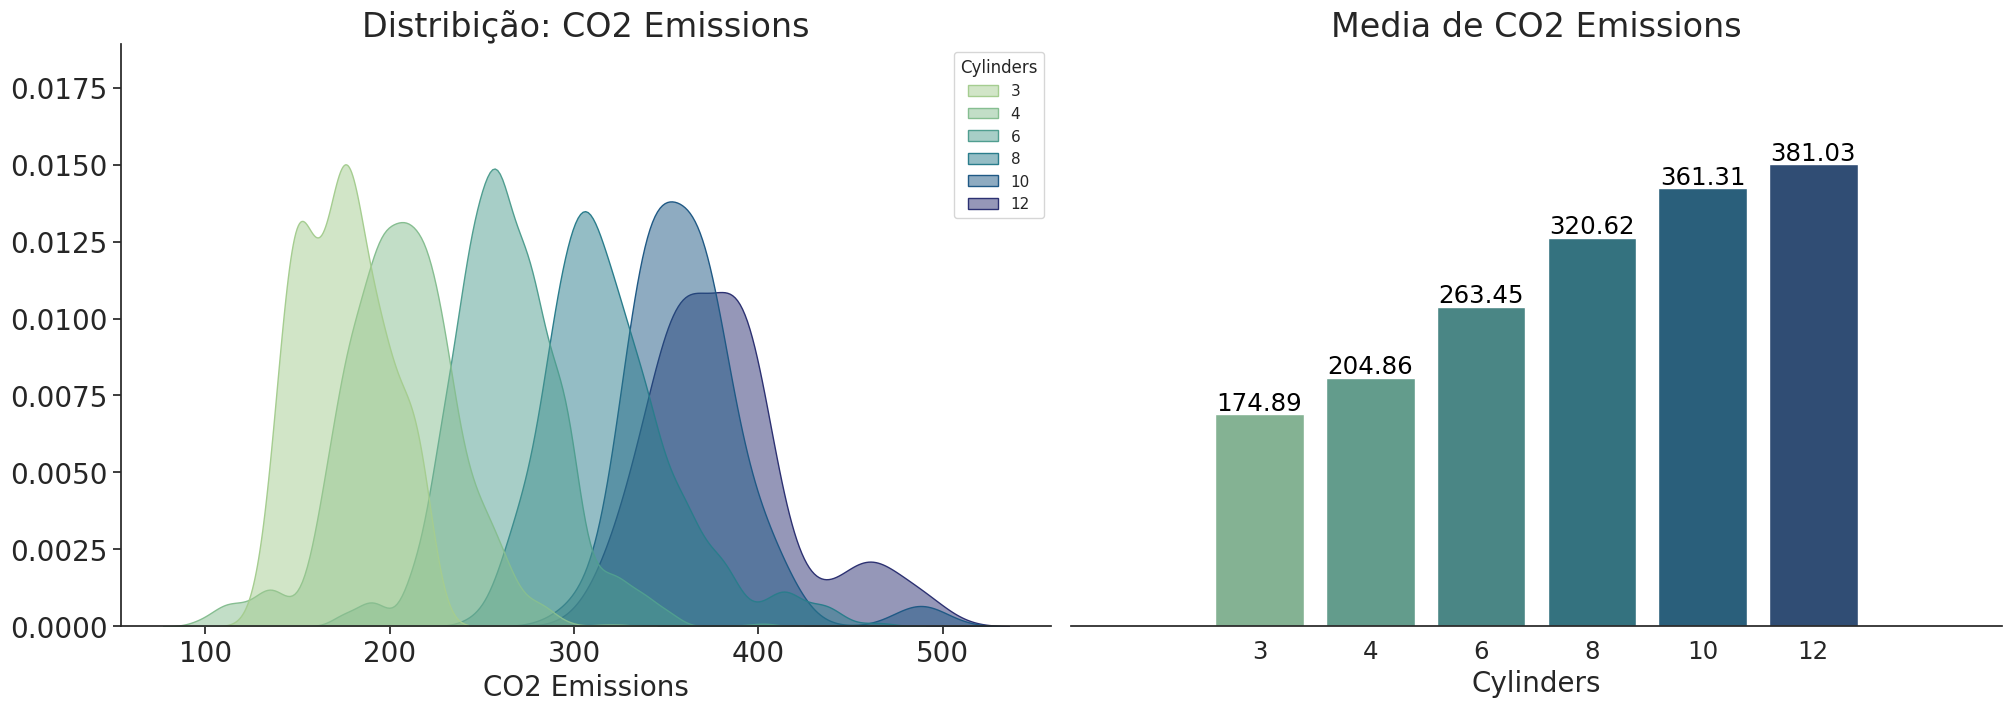

In [95]:
fig = plt.figure(constrained_layout=True, figsize=(20, 7))

# define os eixos (axes)
gs = GridSpec(1, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])

# figura 1: kde plot
f.plot_kde(ax1, df_cylind_sel, x_col="CO2 Emissions", col_hue="Cylinders",
           palette=f.padroes.paletas[1])


# figura 2: bar plot
f.bar_plot_kde(ax2, df_cylind_sel, x_col="Cylinders", y_col="CO2 Emissions",               
               palette=f.padroes.paletas[1])
f.numeros_barras_verticais(ax2, f_numeros_barras=0.15, d=2)

#eixos
ax2.tick_params(axis='x', labelsize=0.15*f._dl(ax2))
ax2.set_xlabel("Cylinders",size=20)

plt.show()

<font color="#A5C9CA" size=2.0><b>
    Conclusões
</b></font>

Neste caso as conclusões podem ser obtidas visualmente e não foi necessário testes  de hipóteses para uma avaliação mais rigorosa. Observando as figuras acima, podemos concluir que a média de emissão de CO2 aumenta com o aumento do número de cilindros nos carros.

<a id="res_hip"></a>
<font color="#404258" size=+1.0><b>
    6.2 Resumo dos resultados dos teste de hipóteses
</b></font>


* A emissão média de CO2 dentre as montadoras que mais emitem CO2 (Dodge, GMC e Mercedes-Benz), não podem ser consideradas equivalentes.


* As emissões médias de CO2 das montadoras Dodge e Mercedes-Benz (que estão entre as 3 que mais emitem) podem ser consideradas iguais.


* A emissões média de CO2 para carros da montadora GMC é maior que para carros das montadoras Dodge e Mercedes-Benz. Isto confirma a montadora GMC como a que mais emite CO2, dentre todas as existentes no dataset.


* O consumo médio de combustível para carros das montadoras com menores consumos (Honda, Mazda e Mini) podem ser considerados iguais.


* As médias de emissão de CO2 podem ser consideradas iguais para carros que usam combustível do tipo D ou do tipo X. E para qualquer outro par de combustível estas médias devem ser consideradas diferentes.

<a id="clustering"></a>
<font color="#404258" size=+2.5><b>
    7. Clusterização
</b></font>

<a href="#indice" class="btn btn-primary btn-sm"
   role="button" aria-pressed="true"      
   style="background-color:#A5C9CA; color:white; border:none"
   data-toggle="popover">
   Índice
</a>

Nesta seção foi analisada a possibilidade de dividir os dados em clusters. O algorítimo considerado foi o 'KMeans'. As etapas desenvolvidas nesta seção são:

- 1. Análise da inércia dos clusters em função do número (k) de clusters considerados. Esta análise permite identificar os valores de k, que podem ser mais adequados para o clusterização dos dados. O método consiste em plotar uma gráfico de linha da inércia em função de k. Uma mudança abrupta no comportamento desta curva é um indicativo bons valores para k, a região onde ocorre esta mudança é informalmente chamada de elbow. Neste trabalho, o efeito descrito não foi identificado, assim, consideramos 3 valores de k para as análises futuras, sendo estes, escolhidos na região que mais se  aproxima de do efeito descrito. Os pontos selecionados são k=2,3 e 4.

- 2. Na sequência, a clusterização foi feita para os valores de k selecionados (2,3 e 4). Os resultados da clusterização foram adicionados como novas colunas no dataset. Lembrando que k pode assumir 3 valores e que desta forma, ao fim do processo, teremos 3 novas colunas no dataset.



In [14]:
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
import modulos.transformacoes_ML as ml_t

In [57]:
# Dataframe com as variáveis numericas
df_num=df.copy()
df_num= df[vars_num]
random_state=10000

# Dataframe para adicionar os resultados da clusterização
df_cluster = df.copy()

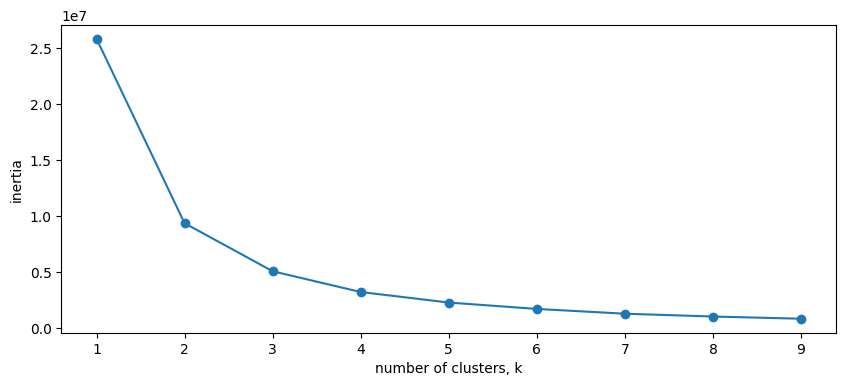

In [67]:
# Etapa 1: Plota ks por inercia

inertias = []
ks = []

# calcula as inercias
for k in range(1, 10):        
    
    model = KMeans(n_clusters=k, random_state=random_state)    
    model.fit(df_num)
    
    # armazena os valores
    inertias.append(model.inertia_)
    ks.append(k)
    
    
# monta a figura
fig, ax = plt.subplots(figsize=(10, 4))
plt.plot(ks, inertias, '-o')
plt.xlabel('number of clusters, k')
plt.ylabel('inertia')
plt.xticks(ks)
plt.show()

In [68]:
# Etapa 2: Adiciona os cluster no 'df_cluster'
for k in [2, 3, 4]:
    model = KMeans(n_clusters=k, random_state=random_state)
    model.fit(df_num)    
    df_cluster["cluster_"+str(k)] = model.predict(df_num)

<a id="viz_t_SNE"></a>
<font color="#404258" size=+1.0><b>
    7.1 Visualização com t-SNE
</b></font>


In [64]:
# realiza a transformação
m = TSNE(learning_rate=70, init='random', random_state=random_state)
tsne_features = m.fit_transform(df_num)


# acrescenta as coordenadas da tranformação nos dados
df_cluster['tSNE_x'] = tsne_features[:,0]
df_cluster['tSNE_y'] = tsne_features[:,1]


In [85]:
# dataframa com clusters e coordenadas da t_sne
df_cluster.head(3)

Make       Model Vehicle Class  Engine Size  Cylinders Transmission  \
0  ACURA         ILX       COMPACT          2.0          4          AS5   
1  ACURA         ILX       COMPACT          2.4          4           M6   
2  ACURA  ILX HYBRID       COMPACT          1.5          4          AV7   

  Fuel Type  Fuel Consumption City  Fuel Consumption Hwy  \
0         Z                    9.9                   6.7   
1         Z                   11.2                   7.7   
2         Z                    6.0                   5.8   

   Fuel Consumption Comb A  Fuel Consumption Comb B  CO2 Emissions  cluster_2  \
0                      8.5                       33            196          1   
1                      9.6                       29            221          1   
2                      5.9                       48            136          1   

   cluster_3  cluster_4     tSNE_x     tSNE_y  
0          0          1   5.252079 -36.335331  
1          0          3 -37.202381   3.697221  
2          0          1 -48.084572 -55.569008

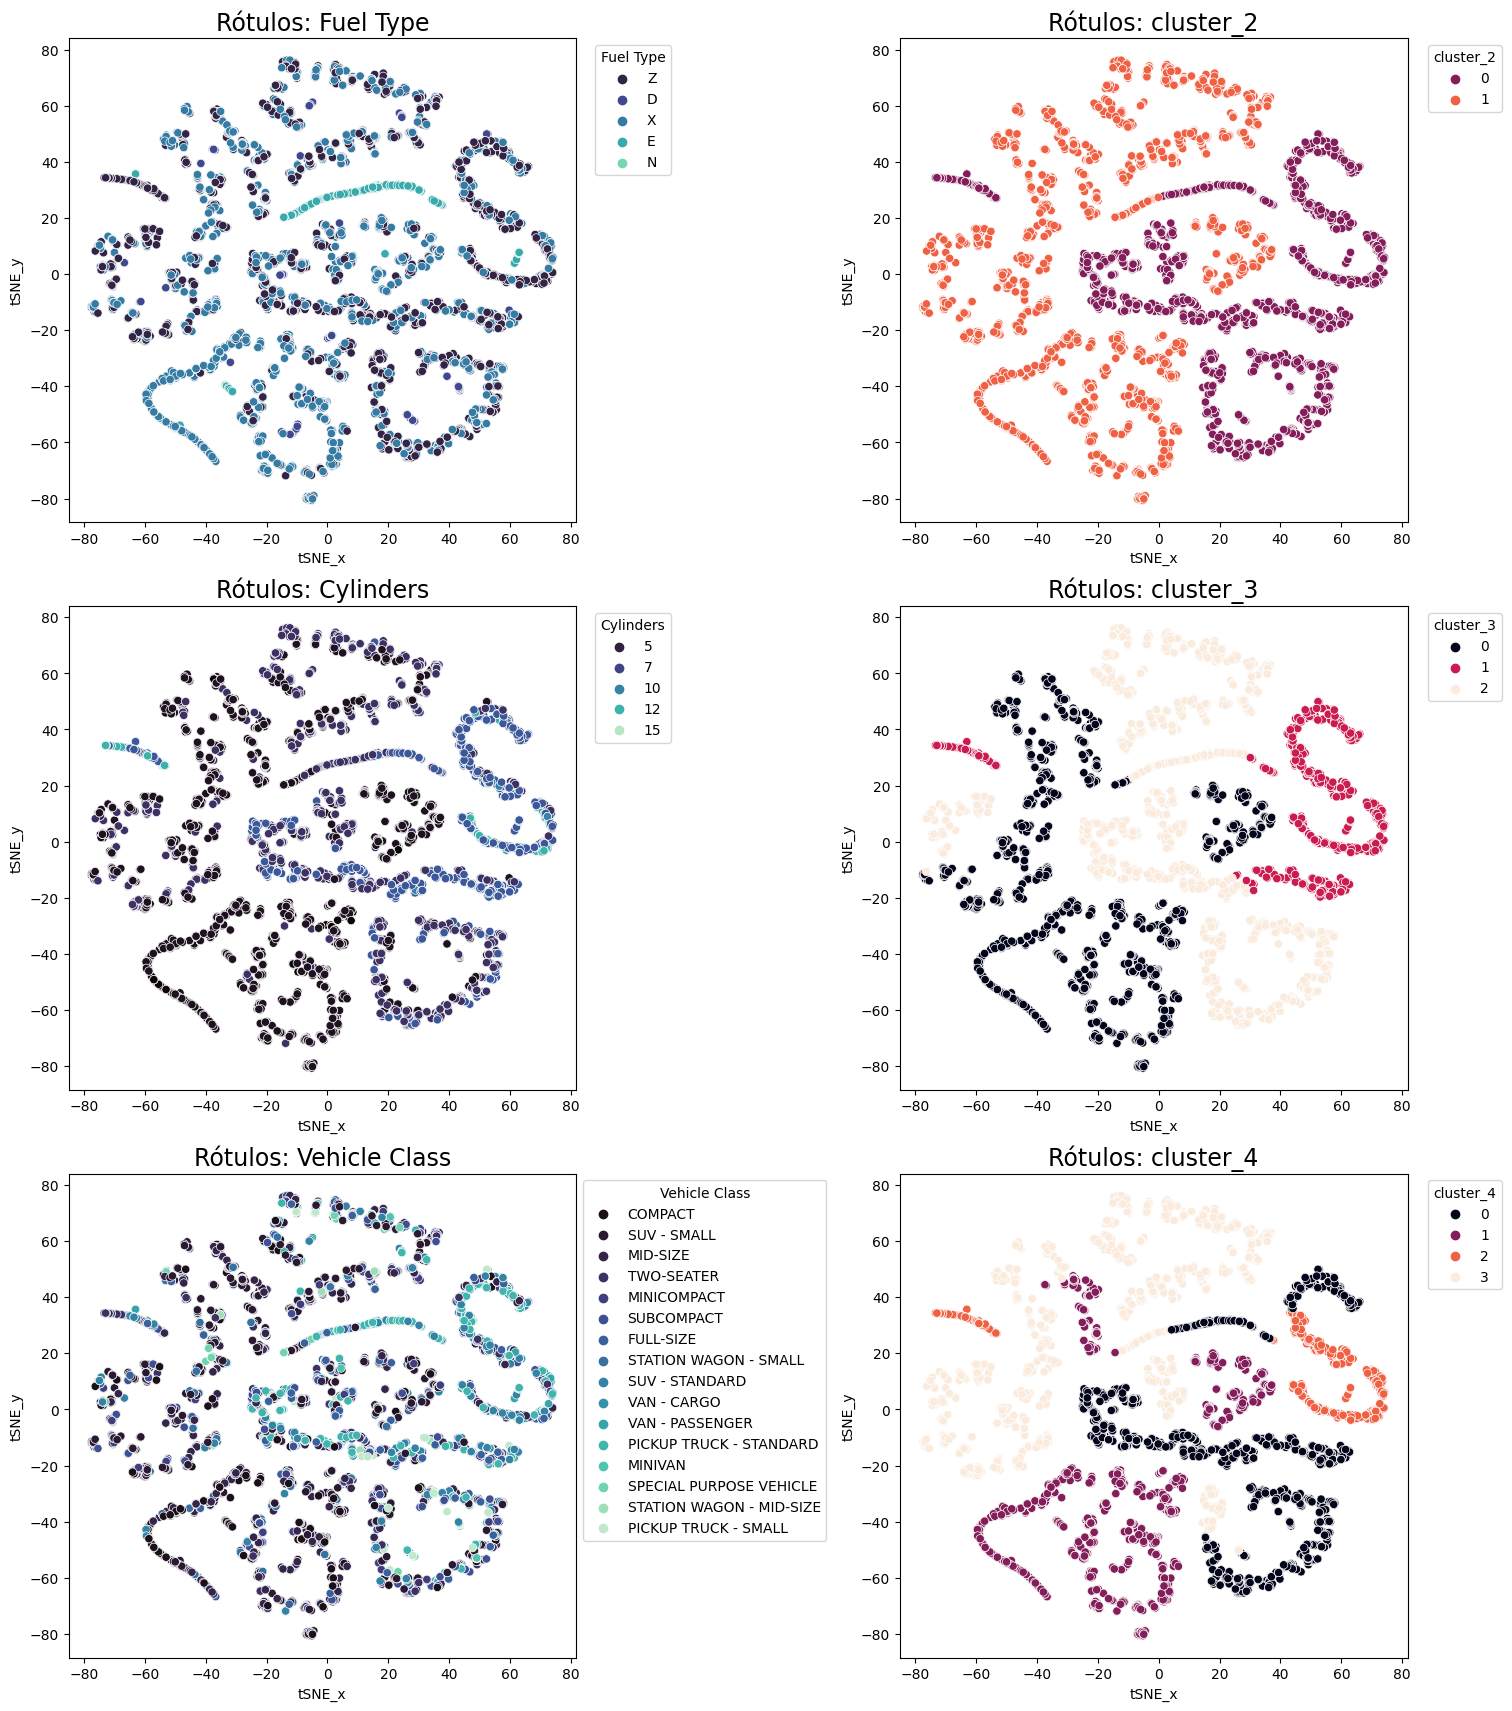

In [82]:
fig = plt.figure(constrained_layout=True, figsize=(15, 17))
    
gs = GridSpec(3, 2, figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[0, 1])
ax3 = fig.add_subplot(gs[1, 0])
ax4 = fig.add_subplot(gs[1, 1])
ax5 = fig.add_subplot(gs[2, 0])
ax6 = fig.add_subplot(gs[2, 1])

colunas=['Fuel Type','Cylinders','Vehicle Class'
         ,'cluster_2','cluster_3','cluster_4']

f.plot_tSNE(ax1, data=df_cluster, hue=colunas[0],title=colunas[0], palette='mako')
f.plot_tSNE(ax3, data=df_cluster, hue=colunas[1],title=colunas[1], palette='mako')
f.plot_tSNE(ax5, data=df_cluster, hue=colunas[2],title=colunas[2], palette='mako')
f.plot_tSNE(ax2, data=df_cluster, hue=colunas[3],title=colunas[3], palette='rocket')
f.plot_tSNE(ax4, data=df_cluster, hue=colunas[4],title=colunas[4], palette='rocket')
f.plot_tSNE(ax6, data=df_cluster, hue=colunas[5],title=colunas[5], palette='rocket')

plt.show()


<a id="mod_prev"></a>
<font color="#404258" size=+2.5><b>
    8. Modelos preditivos
</b></font>

<a href="#indice" class="btn btn-primary btn-sm"
   role="button" aria-pressed="true"      
   style="background-color:#A5C9CA; color:white; border:none"
   data-toggle="popover">
   Índice
</a>

A ideia foi constuir um modelo que preveja a emissão de CO2 para carros, a partir de suas características. A busca por um bom modelo foi feita considerando "cross validation", e o ajuste de hiperparêmetros foi feito com "random search". Segue abaixo alguns pontos relavantes para o entendimento das etapas desenvovidas na pesquisa e construção um bom modelo:

1. Foram considerados dois algorítimos como base: "XGBoost" e "random forest". Os modelos testados consistem em variações nos dados usados para treinamentos deste dois algorítimos.

2. A média para avaliar os modelos foi "mean square root" (MSR).Os melhores modelos são aqueles que levam aos menores valores desta média.

3. O ajuste de hiperparâmetro foi feito por "random search" e foi considerado também "cross validation" com 5 pastas. Com a configuração descrita, para um conjunto de hiperparâmetros usados, teremos, no final da cross validation, 5 possíveis valores para as métricas, sendo um para cada divisão.


<div>
<img src="figuras/esquema_1.png" width="500"/>
</div>

3. A escolha dos melhores hiperparâmetros para um modelo é feita a partir de critérios, que levam em conta as métricas no final da “cross validation”. Na figura acima, vemos que teremos 5 valores para a métrica após a “cross validation”. Como podemos usar estes valores para selecionar os melhores hiperparâmetros?  Não existe uma resposta unânime para esta questão, uma escolha comum consiste em considerar as médias dos 5 valores e escolher os hiperparâmetros que resultam na menor média. Neste trabalho, são considerados 3 critérios para esta escolha, sendo um deles o que foi mencionado acima. Segue abaixo uma descrição de como são feitas as escolhas a partir de cada critério

    - critério 1. calcula as médias dos loss e escolhe o conjunto de hiperparâmetros que resultam na menor média. (este critério foi chamado de **maior_media**)
    - critério 2. Considerando os 5 valores de loss, calcula o grandeza "média + média do desvio padrão". Escolhe os hiperparâmetros que levam ao menor valor desta grandeza (este critério foi chamado de **maior_media_com_dp**)
    - critério 3. Pra cada conjunto de hiperparâmetros, armazenamos o pior valor de loss dentre os 5 possíveis (lembrando que o pior valor de loss neste problema é o maior valor numérico do loss). Os hiperparâmetros escolhidos são aqueles que levam ao menor valor dentre os piores loss armazenados (este critério foi chamado de **maior_score_ruim**). [_Observação_: um nome mais mais apropriado seria 'menor_score_ruim', contudo os códigos foram escritos considerando o nome 'maior_score_ruim' e por isto optei por manter este nome]
    
Segue abaixo um exemplo simples de como decidir entre dois conjuntos de hiperparâmetros (hiperparâmetros 1 e 2) levando em conta os 3 critérios acima:
    
<div>
<img src="figuras/esquema_2.png" width="600"/>
</div>

<font color="#6B728E" size=2.0><b>
    Organização dos trabalhos
</b></font>

Os trabalhos foram organizados em 2 arquivos. O processo de “cross validation” foi feito no arquivo **”2_random_search_models.ipynb”**, localizado na pasta raiz do projeto. A “cross validation” foi feita para cada modelo, sendo que seus resultados foram salvos em arquivos `.joblib`. A partir destes arquivos, foi feita a seleção dos melhores hiperparâmetros considerando os 3 critérios descritos anteriormente. Esta etapa e as posteriores foram feitas neste notebook e serão apresentadas abaixo. As tarefas que seguem são o treinamento do modelo no dataset de treinamento, com os hiperparâmetros escolhidos, os testes dos modelos treinados e escolha do melhore modelo.
Em resumo, as etapas seguidas até a obtenção do melhore modelo são:
1. Para um modelo específico
    1. Separação dos dados em dados de teste e treinamento.
    2. Realização do ajuste de hiperparâmetros (random search) com cross validadtion (feito no arquivo: **2_random_search_models.ipynb**)
    3. Escolha dos melhores hiperparâmetros a partir dos resultados da cross validation. 
    4. Treinamento do modelo com os hiperparâmetros escolhidos com um dataset de treinamento.
    5. Teste do modelo treinado na etapa 4, em um dataset de teste.
2. Comparação entres as métricas nos dados de teste para todos os modelos considerados.
3. Escolha do melhor modelo como sendo o que apresenta o menor valor para a métrica no dados de teste.

In [8]:
# importa modulos
import modulos.funcoes_ML as func_ml
import modulos.transformacoes_ML as trans_ml
import joblib

from sklearn import metrics
from sklearn.model_selection import train_test_split

In [9]:
path_modelos=Path(current_path)/"modelos"


<a id="prep_dados"></a>
<font color="#404258" size=+1.0><b>
    8.1 Preparação dos dados
</b></font>


In [34]:
# Codifica variáveis categóricas
df_modelos = df.copy()
lab_enc = trans_ml.Mapeamento()
df_modelos = lab_enc.fit_transform(df_modelos)

In [35]:
# dados de teste e treinamento
df_train, df_test = train_test_split(df_modelos,test_size=0.2, random_state=1000)

# variável treinamento e alvo
col_alvo='CO2 Emissions'
col_treinamento=[var for var in df_modelos.columns if var != 'CO2 Emissions']

# dados de treinamento
X_train=df_train[col_treinamento].values
y_train=df_train[col_alvo].values

# dados de teste
X_test=df_test[col_treinamento].values
y_test=df_test[col_alvo].values


<a id="val_mod"></a>
<font color="#404258" size=+1.0><b>
    8.2 Validação dos modelos
</b></font>


In [36]:
def armazena_resultados(df_res,
                        y_train,y_hat_train,
                        y_test, y_hat_test,
                        nome_modelo=None,                        
                        criterio_sel=None):    
  
    # adiciona nova linha no dataframe
    df2 = pd.DataFrame({
        'Modelos':[nome_modelo],
        'criterio_sel_CV': [criterio_sel],
        'MSE_train':[metrics.mean_squared_error(y_train, y_hat_train)],
        'MSE_test': [metrics.mean_squared_error(y_test, y_hat_test)]
    })   
    
    return(pd.concat([df_res , df2]))


In [37]:
# dataframe para armazenar os resultados
df_res = pd.DataFrame(columns=['Modelos',
                     'criterio_sel_CV',
                     'MSE_train',
                     'MSE_test'])

In [38]:
#lista modelos
l=os.listdir(path_modelos)
objetos_search=[x for x in l if x.endswith(".joblib")]

for obj in objetos_search: 
    
    # carrega pipeline com a random search
    pipe_search_CV = joblib.load(path_modelos/obj)
    
    # carrega o objeto com a random search/e o mode
    obj_CV = func_ml.get_rand_search(pipe_search_CV)   
    
    # seleciona hiperparâmetros da CV(3 critérios)
    sel_hip={
        "maior_media_com_dp":func_ml\
            .seleciona_resultados(obj_CV)[1][0],
        "maior_score_ruim":func_ml\
            .seleciona_resultados(obj_CV)[1][1],         
        "maior_media":obj_CV.best_params_
        }
            
    
    # metrica para os hip. selecionados
    for key, params in sel_hip.items(): 
        
        # escreve o pipeline
        pipe= func_ml.make_best_pipeline(pipe_search_CV,
                                         params)        
    
        #treina e testa o pipeline
        pipe.fit(X_train,y_train)    
        y_hat_test = pipe.predict(X_test)
        y_hat_train = pipe.predict(X_train)

        #armazena resultados
        df_res=armazena_resultados(df_res,
                        y_train,y_hat_train,
                        y_test, y_hat_test,
                        nome_modelo = obj.split('.')[0],
                        criterio_sel=key)        
        

In [163]:
# salva os resultados
df_res.to_csv(path_dados/"resultado_modelos.csv", index=False)

<font color="#6B728E" size=2.0><b>
    Melhores modelos considerando a métrica avaliada nos dados de teste
</b></font>

In [158]:
# Mostra os melhores modelos
df_res.sort_values(by='MSE_test').head(5)

Modelos   criterio_sel_CV  MSE_train   MSE_test
0  kmeans_3_XGBoost_  maior_score_ruim   3.097991  13.329965
0  kmeans_2_XGBoost_  maior_score_ruim   3.111713  13.567278
0  kmeans_4_XGBoost_  maior_score_ruim   3.167294  13.688359
0  kmeans_2_XGBoost_       maior_media   2.775749  13.727174
0            XGBoost  maior_score_ruim   3.251888  13.757039

<font color="#6B728E" size=2.0><b>
    Serie dos modelos em ordem decrescente da métrica (últimos pontos são realativos aos melhores modelos)
</b></font>


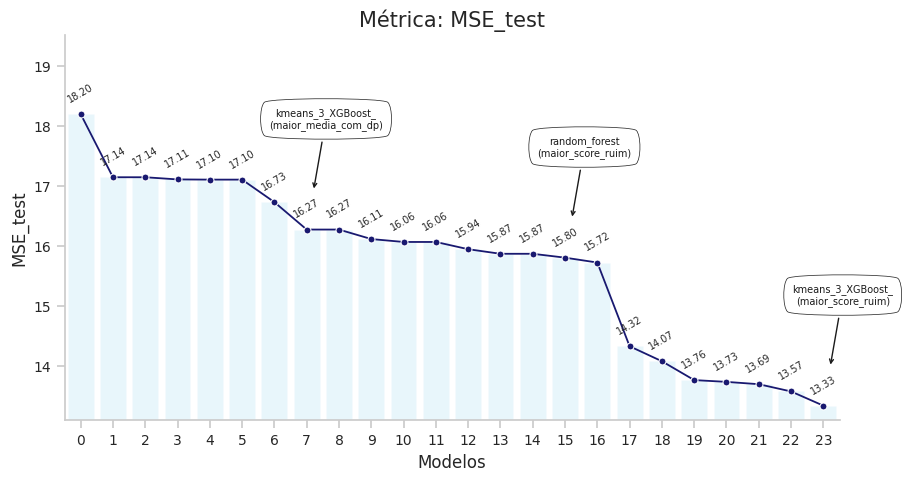

In [20]:
# carrega os resultados
df_mod = pd.read_csv(path_dados/"resultado_modelos.csv", low_memory=False) 

#organiza os resultados
data= df_mod.sort_values(by='MSE_test', ascending=False)

# Monta o gráfico de linhas
fig,ax = plt.subplots(figsize=(10,5))

f.plot_line_metrica_models(ax,
                         data,
                         y_inp='MSE_test')

# plota as barras
sns.barplot( data=data,
            x=[x for x in range(len(data))],
            y='MSE_test',
            ax=ax,
            color='#00BFFF',
            alpha=0.1)

plt.show()



**Melhor modelo: kmeans_3_XKGoost**

    Este modelo consiste em fazer clusterização com KMeans e k=3. Os resultados da clusterização devem ser adicionados como uma nova coluna nos dados. Este novo dataset deve ser usado para treinar o modelo XGBoost com os hiperparâmetros escolhidos com o critério "maior score ruim"
    
    